<img src="https://1000logos.net/wp-content/uploads/2017/11/Zillow-Logo.png" title="Zillow Logo"/>

***

- imports that we will be using for this data set

In [154]:
# fetches the data
import acquire
# credentials file to access the data
import env
# Imports functions necessary to run visuals and hides unnecessary code
import wrangle

# coding 
import math
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import scipy.stats
import scipy
import os

# needed for modeling
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans


***

Fips dictionary:
- 6037.0 = Los Angeles,CA
- 6059.0 = Orange,CA
- 6111.0 = Ventura,CA

## PLAN
### 1. [Acquire Data](#Acquire:)
### Takeaways:
- Data is collected from the codeup cloud database with an appropriate SQL query.
- Data is imported using an acquire.py file.
- Original dataframe consisted of 71858 rows × 69 columns.
- Null values/ missing data are very common in about 50 percent of the data. 
 
### 2. [Prepare](#Prepare:)
### - Using [wrangle.py]()
### Takeaways:
- Before cleaning data and dropping unnecesary columns, 71858 rows × 69 columns.
- After dropping nulls and collumns, 44679 rows × 12 columns.
- resulted in 62% row retention 17% column retention.
- we continued to split the data into train, validate, and test for exploration and modeling purposes.

### 3. [Explore](#Explore:)
### Summary:
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between bathroomcnt and logerror.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between calculatedfinishedsquarefeet and logerror.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between bedroomcnt and logerror.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between yearbuilt and logerror.
- Based on the correlation test above fips and log error have no correlation.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between taxvaluedollarcnt and logerror.

### [Modeling](#Modeling:)

# <span style="color:blue">Acquiring Data</span>

In [2]:
# importing and aquiring data set
df = acquire.get_zillow_data()

### - Summary

In [3]:
# summary function for DataFrame
wrangle.summarize(df)

--- Shape: (71858, 69)
--- Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71858 entries, 0 to 71857
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   propertylandusetypeid         71858 non-null  float64
 1   parcelid                      71858 non-null  int64  
 2   storytypeid                   47 non-null     float64
 3   typeconstructiontypeid        223 non-null    float64
 4   heatingorsystemtypeid         46680 non-null  float64
 5   buildingclasstypeid           0 non-null      float64
 6   architecturalstyletypeid      207 non-null    float64
 7   airconditioningtypeid         23069 non-null  float64
 8   id                            71858 non-null  int64  
 9   basementsqft                  47 non-null     float64
 10  bathroomcnt                   71858 non-null  float64
 11  bedroomcnt                    71858 non-null  float64
 12  buildingqualitytypeid      

--- Nulls by Column: propertylandusetypeid               0
parcelid                            0
storytypeid                     71811
typeconstructiontypeid          71635
heatingorsystemtypeid           25178
buildingclasstypeid             71858
architecturalstyletypeid        71651
airconditioningtypeid           48789
id                                  0
basementsqft                    71811
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           26795
calculatedbathnbr                 223
decktypeid                      71269
finishedfloor1squarefeet        66161
calculatedfinishedsquarefeet      156
finishedsquarefeet12              335
finishedsquarefeet13            71856
finishedsquarefeet15            71847
finishedsquarefeet50            66161
finishedsquarefeet6             71692
fips                                0
fireplacecnt                    63754
fullbathcnt                       223
garagecarcnt                 

***

# <span style="color:blue">Prepare:</span>
- all these functions will be found in the explore.py file

###  What percentage of data is missing per column?

In [4]:
#looking at percentage of null values by column
wrangle.nulls_by_columns(df).sort_values(by= 'percent', ascending=False)

,count,percent
buildingclasstypeid,71858,1.000000
buildingclassdesc,71858,1.000000
finishedsquarefeet13,71856,0.999972
finishedsquarefeet15,71847,0.999847
storydesc,71811,0.999346
basementsqft,71811,0.999346
storytypeid,71811,0.999346
yardbuildingsqft26,71788,0.999026
finishedsquarefeet6,71692,0.997690
fireplaceflag,71686,0.997606


### Takeaways:

- we can see that there is a large percentage of information missing in alot of the columns (ranging from column regionidneighborhood with %60 data missing to buildingclasstypeid with %100 of the data missing.

### Functions to clean data:

- lets build a function to address the columns with large percentage of missing data.

In [5]:
# range of out liers 1.5 is recomended 
k = 1.5
#creating a cols value of columns that we want for the outliers to be handled
cols = ['bathroomcnt', 'bedroomcnt','calculatedfinishedsquarefeet','yearbuilt','lotsizesquarefeet']    

def handle_outliers(df, cols, k):
    """this will eliminate most outliers, use a 1.5 k value if unsure because it is the most common, make sure to define cols value as the features
    you want the outliers to be handled. this should be done before running the function and outiside of it"""

    
    # Create placeholder dictionary for each columns bounds
    bounds_dict = {}
   
    for col in cols:
        # get necessary iqr values
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        upper_bound =  q3 + k * iqr
        lower_bound =  q1 - k * iqr

        #store values in a dictionary referencable by the column name
        #and specific bound
        bounds_dict[col] = {}
        bounds_dict[col]['upper_bound'] = upper_bound
        bounds_dict[col]['lower_bound'] = lower_bound

    for col in cols:
        #retrieve bounds
        col_upper_bound = bounds_dict[col]['upper_bound']
        col_lower_bound = bounds_dict[col]['lower_bound']

        #remove rows with an outlier in that column
        df = df[(df[col] < col_upper_bound) & (df[col] > col_lower_bound)]
        
    return df
df = handle_outliers(df, cols, k)
df

,propertylandusetypeid,parcelid,storytypeid,typeconstructiontypeid,heatingorsystemtypeid,buildingclasstypeid,architecturalstyletypeid,airconditioningtypeid,id,basementsqft,...,id.1,logerror,transactiondate,airconditioningdesc,architecturalstyledesc,buildingclassdesc,heatingorsystemdesc,typeconstructiondesc,storydesc,propertylandusedesc
0,261.0,14297519,NaN,NaN,NaN,NaN,NaN,NaN,1727539,NaN,...,0,0.025595,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Single Family Residential
1,261.0,17052889,NaN,NaN,NaN,NaN,NaN,NaN,1387261,NaN,...,1,0.055619,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Single Family Residential
2,261.0,14186244,NaN,NaN,NaN,NaN,NaN,NaN,11677,NaN,...,2,0.005383,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Single Family Residential
3,261.0,12177905,NaN,NaN,2.0,NaN,NaN,NaN,2288172,NaN,...,3,-0.103410,2017-01-01,NaN,NaN,NaN,Central,NaN,NaN,Single Family Residential
5,266.0,17143294,NaN,NaN,NaN,NaN,NaN,NaN,1447245,NaN,...,5,-0.020526,2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,Condominium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71851,261.0,12412492,NaN,NaN,2.0,NaN,NaN,NaN,2274245,NaN,...,77607,0.001082,2017-09-19,NaN,NaN,NaN,Central,NaN,NaN,Single Family Residential
71854,261.0,17239384,NaN,NaN,NaN,NaN,NaN,NaN,2968375,NaN,...,77610,0.013209,2017-09-21,NaN,NaN,NaN,NaN,NaN,NaN,Single Family Residential
71855,261.0,12773139,NaN,NaN,2.0,NaN,NaN,1.0,1843709,NaN,...,77611,0.037129,2017-09-21,Central,NaN,NaN,Central,NaN,NaN,Single Family Residential
71856,261.0,12826780,NaN,NaN,2.0,NaN,NaN,NaN,1187175,NaN,...,77612,0.007204,2017-09-25,NaN,NaN,NaN,Central,NaN,NaN,Single Family Residential


## Takeaways
- Before dropping nulls, we had (71858 rows, 69 cols).
- After dropping nulls, we ended with (43964 rows × 69 columns).

### Lets see what were left with

In [6]:
# a view a how many null values exist in each column
wrangle.nulls_by_columns(df).sort_values(by= 'percent', ascending=False)

,count,percent
buildingclassdesc,49964,1.000000
buildingclasstypeid,49964,1.000000
finishedsquarefeet15,49964,1.000000
finishedsquarefeet13,49963,0.999980
basementsqft,49938,0.999480
storydesc,49938,0.999480
storytypeid,49938,0.999480
yardbuildingsqft26,49921,0.999139
architecturalstyletypeid,49896,0.998639
architecturalstyledesc,49896,0.998639


### Lets address the rest of the  null values

### columns to remove:(column, reason for removal)
removing 
- (id, id.1, parcelid,'propertylandusetypeid','buildingqualitytypeid'), id is not necessary for our algorithms and will confuse any models from here on forward.
- (fullbathcnt,calculatedbathnbr,roomcnt),  any room room count other the bedroomcnt or bathroomcnt is not necessary considering that they return similar information if not combined info.
- (propertyzoningdesc,rawcensustractandblock,regionidcounty,censustractandblock), considering that fips is being kept for region identification purposes, these columns are not necessary.
- (assessmentyear, landtaxvaluedollarcnt, taxamount, transactiondate), considering that we have already filtered out the data to only return back information for the year 2017, and are keeping taxvaluedollarcnt, these columns are not necessary because this information can be obtained through the data that we will be keeping.
- (heatingorsystemdesc,finishedsquarefeet12,propertylandusedesc,'propertycountylandusecode','unitcnt'), calculatedfinishedsquarefeet already covers this info and heatingorsystemid already identifies this information numerically.

In [7]:
def drop_columns(df):
    """ using this function to drop columns that i wont be using for exploration stage of this project"""
    # drop function to remove columns
    df = df.drop(columns=['heatingorsystemtypeid','buildingqualitytypeid','id','parcelid','calculatedbathnbr','propertylandusetypeid','fullbathcnt','propertyzoningdesc','rawcensustractandblock','regionidcounty',
    'roomcnt','structuretaxvaluedollarcnt','assessmentyear','landtaxvaluedollarcnt','taxamount','censustractandblock',
    'id.1','transactiondate','heatingorsystemdesc','finishedsquarefeet12','propertylandusedesc','propertycountylandusecode','unitcnt'])
    return df


def split(df):
    """ using this funciton to split data into train, validate, & test in order to explore, model and test data."""
    train_and_validate, test = train_test_split(df, random_state=13, test_size=.15)
    train, validate = train_test_split(train_and_validate, random_state=13, test_size=.2)

    print('Train: %d rows, %d cols' % train.shape)
    print('Validate: %d rows, %d cols' % validate.shape)
    print('Test: %d rows, %d cols' % test.shape)
    
    return train, validate, test    

def handle_missing_values(df, prop_required_column, prop_required_row):
    """this piece of code allows us to handle the missing data and get rid of it, both in the columns and in the rows(so that we can analize better)."""
    print ('Before dropping nulls, %d rows, %d cols' % df.shape)
    n_required_column = round(df.shape[0] * prop_required_column)
    n_required_row = round(df.shape[1] * prop_required_row)
    # drops based on percentage missing in row
    df = df.dropna(axis=0, thresh=n_required_row)
    #drops na based on percentage missing in collumn
    df = df.dropna(axis=1, thresh=n_required_column)
    #drops na values in colums
    df = drop_columns(df)
    #dropping.
    df = df.dropna()
    print('After dropping nulls. %d rows. %d cols' % df.shape)
    return df

def get_exploration_data(df):
    #drops rows and columns with more than %50 data missing
    print('Before dropping nulls, %d rows, %d cols' % df.shape)
    # calls on function from above and we give it a no .5 value to drop na with over %50 data missing
    df = handle_missing_values(df, prop_required_column=.5, prop_required_row=.5)
    print('After dropping nulls, %d rows, %d cols' % df.shape)
    return df
#calling the function 
df = get_exploration_data(df)

Before dropping nulls, 49964 rows, 69 cols
Before dropping nulls, 49964 rows, 69 cols
After dropping nulls. 44092 rows. 12 cols
After dropping nulls, 44092 rows, 12 cols


In [8]:
# a view a how many null values exist in each column
wrangle.nulls_by_columns(df).sort_values(by= 'percent', ascending=False)

,count,percent
bathroomcnt,0,0.0
bedroomcnt,0,0.0
calculatedfinishedsquarefeet,0,0.0
fips,0,0.0
latitude,0,0.0
longitude,0,0.0
lotsizesquarefeet,0,0.0
regionidcity,0,0.0
regionidzip,0,0.0
yearbuilt,0,0.0


# Clustering

### How many clusters should we make?

In [9]:
# building and X to start clustering
X = df[['bathroomcnt', 'calculatedfinishedsquarefeet','bedroomcnt','yearbuilt','taxvaluedollarcnt']]

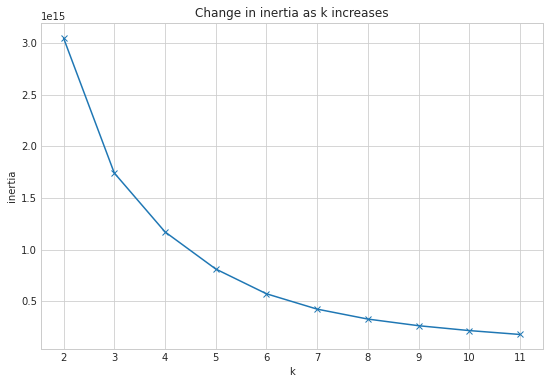

In [10]:
# visualizing drop to estimate what number of clusters work best for the model
with plt.style.context('seaborn-whitegrid'):
    #graph size
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')


### Takeways:
- 3 point inertia drop from 2-3
- 1 point inertia drop from 3-4

### Conclusion:
- we will create 3 clusters

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 1, ..., 1, 0, 1], dtype=int32)

In [12]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,bathroomcnt,calculatedfinishedsquarefeet,bedroomcnt,yearbuilt,taxvaluedollarcnt
0,2.395792,1951.222762,3.305304,1965.894210,6.681559e+05
1,1.926063,1492.085415,3.018262,1959.378902,2.309431e+05
2,2.783918,2356.685976,3.345274,1957.469512,1.843077e+06


In [13]:
df['cluster'] = kmeans.predict(X)


In [14]:
df.groupby('cluster')['bathroomcnt', 'calculatedfinishedsquarefeet','bedroomcnt','yearbuilt','taxvaluedollarcnt'].mean()


,bathroomcnt,calculatedfinishedsquarefeet,bedroomcnt,yearbuilt,taxvaluedollarcnt
cluster,,,,,
0,2.396057,1951.543257,3.305085,1965.894694,6.685269e+05
1,1.926309,1492.298049,3.018590,1959.383807,2.311151e+05
2,2.783918,2356.685976,3.345274,1957.469512,1.843077e+06


In [15]:
df

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
1,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,97099.0,1967.0,464000.0,0.055619,0
2,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,97078.0,1962.0,564778.0,0.005383,0
3,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,396551.0,96330.0,1970.0,145143.0,-0.103410,1
5,2.0,3.0,1492.0,6111.0,34230044.0,-118993991.0,903.0,51239.0,97091.0,1982.0,331064.0,-0.020526,1
7,1.0,2.0,738.0,6037.0,34149214.0,-118239357.0,4214.0,45457.0,96325.0,1922.0,218552.0,0.101723,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71851,2.0,4.0,1633.0,6037.0,33870815.0,-118070858.0,4630.0,30267.0,96204.0,1962.0,346534.0,0.001082,1
71854,2.0,4.0,1612.0,6111.0,34300140.0,-118706327.0,12105.0,27110.0,97116.0,1964.0,67205.0,0.013209,1
71855,1.0,3.0,1032.0,6037.0,34040895.0,-118038169.0,5074.0,36502.0,96480.0,1954.0,49546.0,0.037129,1
71856,2.0,3.0,1762.0,6037.0,33937685.0,-117996709.0,6347.0,14634.0,96171.0,1955.0,522000.0,0.007204,0


Text(0.5, 1.0, 'Visualizing Cluster Centers')

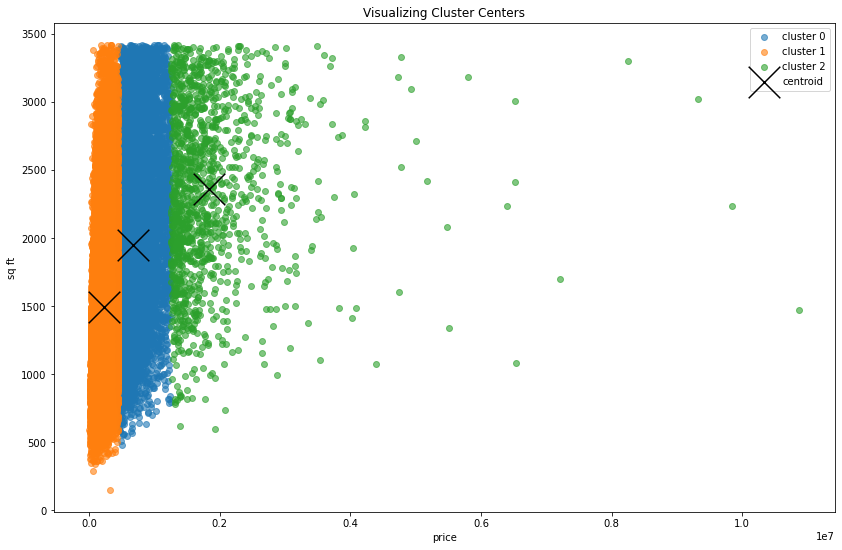

In [16]:
#graph size 
plt.figure(figsize=(14, 9))
#graphing after weve clustered using a scatter plot
for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.taxvaluedollarcnt, subset.calculatedfinishedsquarefeet, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='calculatedfinishedsquarefeet', x='taxvaluedollarcnt', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('price')
plt.ylabel('sq ft')
plt.title('Visualizing Cluster Centers')


In [17]:
# look at the first 5 rows of our new dataframe, transposed
centroids.head().T

,0,1,2
bathroomcnt,2.395792,1.926063,2.783918e+00
calculatedfinishedsquarefeet,1951.222762,1492.085415,2.356686e+03
bedroomcnt,3.305304,3.018262,3.345274e+00
yearbuilt,1965.894210,1959.378902,1.957470e+03
taxvaluedollarcnt,668155.941588,230943.117038,1.843077e+06


In [18]:
# seperating our data into clusters
cluster1 =df[df.cluster == 0]
cluster1

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
1,1.0,2.0,1465.0,6111.0,34449266.0,-119281531.0,12647.0,13091.0,97099.0,1967.0,464000.0,0.055619,0
2,2.0,3.0,1243.0,6059.0,33886168.0,-117823170.0,8432.0,21412.0,97078.0,1962.0,564778.0,0.005383,0
15,2.0,4.0,1677.0,6059.0,33642800.0,-117707211.0,5304.0,32380.0,96962.0,1981.0,528847.0,-0.021896,0
20,2.5,3.0,2074.0,6059.0,33586693.0,-117697202.0,5600.0,25458.0,96971.0,1978.0,597213.0,-0.006653,0
21,2.5,3.0,2018.0,6059.0,33728985.0,-117754647.0,2800.0,52650.0,96954.0,1998.0,534612.0,0.044309,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71820,3.0,4.0,2180.0,6037.0,33885900.0,-118373000.0,7509.0,33612.0,96124.0,1973.0,797109.0,0.064191,0
71821,2.0,4.0,1689.0,6037.0,34106193.0,-117830253.0,8028.0,33836.0,96513.0,1978.0,574000.0,-0.016622,0
71832,3.0,3.0,1774.0,6037.0,34158519.0,-118451574.0,5834.0,12447.0,96412.0,1949.0,796324.0,0.002138,0
71843,2.0,3.0,1472.0,6037.0,34123355.0,-118180658.0,4454.0,12447.0,96023.0,1927.0,603333.0,-0.062404,0


In [19]:
# seperating our data into clusters
cluster2 = df[df.cluster == 1]
cluster2

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
3,3.0,4.0,2376.0,6037.0,34245180.0,-118240722.0,13038.0,396551.0,96330.0,1970.0,145143.0,-0.103410,1
5,2.0,3.0,1492.0,6111.0,34230044.0,-118993991.0,903.0,51239.0,97091.0,1982.0,331064.0,-0.020526,1
7,1.0,2.0,738.0,6037.0,34149214.0,-118239357.0,4214.0,45457.0,96325.0,1922.0,218552.0,0.101723,1
8,3.0,4.0,3039.0,6037.0,33960230.0,-118006914.0,20028.0,14634.0,96173.0,1970.0,220583.0,-0.040966,1
10,3.0,4.0,2540.0,6037.0,34434971.0,-118464390.0,10384.0,54311.0,96374.0,1999.0,430108.0,0.005963,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71850,2.0,3.0,1570.0,6037.0,34194943.0,-118629218.0,7499.0,12447.0,96342.0,1958.0,72026.0,0.081196,1
71851,2.0,4.0,1633.0,6037.0,33870815.0,-118070858.0,4630.0,30267.0,96204.0,1962.0,346534.0,0.001082,1
71854,2.0,4.0,1612.0,6111.0,34300140.0,-118706327.0,12105.0,27110.0,97116.0,1964.0,67205.0,0.013209,1
71855,1.0,3.0,1032.0,6037.0,34040895.0,-118038169.0,5074.0,36502.0,96480.0,1954.0,49546.0,0.037129,1


In [20]:
# seperating our data into clusters
cluster3

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
96,2.5,3.0,3011.0,6059.0,33628725.0,-117873172.0,6944.0,53571.0,96978.0,1973.0,1441252.0,-0.201121,2
132,3.0,4.0,3107.0,6037.0,34154597.0,-118514596.0,17166.0,12447.0,96349.0,1957.0,1279125.0,-0.013062,2
168,2.5,3.0,2134.0,6059.0,33624386.0,-117919255.0,6375.0,53571.0,96981.0,1995.0,1794000.0,0.048630,2
268,2.0,3.0,1956.0,6037.0,34040419.0,-118480389.0,8008.0,26964.0,96150.0,1927.0,2715793.0,-0.088941,2
277,3.0,4.0,2409.0,6037.0,34038659.0,-118498682.0,7521.0,26964.0,96149.0,1927.0,2100270.0,-0.206738,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71745,3.0,3.0,1687.0,6037.0,34053344.0,-118474937.0,6999.0,12447.0,96030.0,1947.0,2000000.0,0.075964,2
71752,2.0,3.0,2240.0,6037.0,34030263.0,-118838416.0,9533.0,12520.0,96116.0,1977.0,1582000.0,0.073576,2
71779,3.0,4.0,3148.0,6037.0,33891606.0,-118389223.0,7001.0,19177.0,96117.0,1993.0,2082201.0,0.035489,2
71807,2.0,3.0,1467.0,6037.0,33899557.0,-118399615.0,4643.0,19177.0,96117.0,1951.0,1629476.0,0.028893,2


<div class="alert alert-block alert-info">
<b>Cluster number:</b> 2
</div>

# <span style="color:blue">Split Data:</span>

In [21]:
# get train to expolore 
train, validate, test = wrangle.split(cluster1)
# seeing what the train split dataset
train.info()

Train: 9227 rows, 13 cols
Validate: 2307 rows, 13 cols
Test: 2036 rows, 13 cols
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9227 entries, 19904 to 46857
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   9227 non-null   float64
 1   bedroomcnt                    9227 non-null   float64
 2   calculatedfinishedsquarefeet  9227 non-null   float64
 3   fips                          9227 non-null   float64
 4   latitude                      9227 non-null   float64
 5   longitude                     9227 non-null   float64
 6   lotsizesquarefeet             9227 non-null   float64
 7   regionidcity                  9227 non-null   float64
 8   regionidzip                   9227 non-null   float64
 9   yearbuilt                     9227 non-null   float64
 10  taxvaluedollarcnt             9227 non-null   float64
 11  logerror                      9227 n

***

In [22]:
#train sample
train

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
19904,2.0,2.0,1266.0,6037.0,33959079.0,-118438909.0,5400.0,12447.0,96129.0,1953.0,944000.0,0.148924,0
10955,3.0,4.0,2841.0,6037.0,34137641.0,-117830115.0,10485.0,11626.0,96486.0,1959.0,507358.0,0.014979,0
46639,3.0,5.0,2760.0,6111.0,34264430.0,-118867445.0,8646.0,25974.0,97097.0,1985.0,460766.0,-0.018784,0
45902,1.0,3.0,1219.0,6037.0,33837831.0,-118095892.0,5257.0,12292.0,96213.0,1953.0,465000.0,0.026445,0
55650,3.0,3.0,1923.0,6037.0,34065600.0,-118409000.0,17997.0,10389.0,96088.0,2002.0,566504.0,-0.112036,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26959,3.0,5.0,2573.0,6111.0,34209435.0,-118881200.0,14408.0,34278.0,96383.0,1969.0,517569.0,0.026809,0
14525,3.0,4.0,2210.0,6059.0,33719108.0,-117921771.0,7250.0,8384.0,97008.0,1973.0,802047.0,0.009141,0
45375,2.0,3.0,1895.0,6037.0,34153603.0,-117953027.0,15772.0,24435.0,399675.0,1962.0,719700.0,-0.014332,0
6171,2.0,2.0,1287.0,6059.0,33619592.0,-117642335.0,3161.0,12773.0,96996.0,1973.0,509294.0,0.154019,0


In [23]:
#validate sample
validate

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
23872,2.0,2.0,1622.0,6037.0,34186400.0,-118327738.0,6192.0,396054.0,96438.0,1947.0,534390.0,-0.018638,0
459,3.0,4.0,2170.0,6037.0,34040862.0,-117988208.0,6082.0,113576.0,96490.0,1990.0,599000.0,0.082111,0
14641,4.0,4.0,1906.0,6037.0,33952853.0,-118443334.0,5520.0,12447.0,96129.0,1929.0,610663.0,0.000093,0
12892,3.0,4.0,2544.0,6037.0,34266656.0,-118310236.0,4030.0,12447.0,96282.0,2003.0,606518.0,0.002815,0
13717,2.0,3.0,2012.0,6111.0,34211761.0,-119194107.0,10647.0,13150.0,97101.0,1989.0,459098.0,0.001930,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33377,2.0,4.0,1822.0,6059.0,33904896.0,-117913440.0,6800.0,24812.0,97043.0,1975.0,569544.0,0.032368,0
41625,3.0,4.0,1632.0,6037.0,34047523.0,-118177249.0,1684.0,17882.0,96044.0,2007.0,450000.0,0.146678,0
42738,2.0,3.0,1982.0,6037.0,34048947.0,-118538363.0,9240.0,12447.0,96120.0,1953.0,824440.0,0.020678,0
52008,3.0,4.0,2995.0,6111.0,34185151.0,-119235312.0,4103.0,13150.0,97106.0,2005.0,905845.0,0.064577,0


In [24]:
# test sample
test

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
69445,3.0,4.0,2731.0,6111.0,34304090.0,-118833217.0,6104.0,25974.0,97097.0,1989.0,512682.0,0.011348,0
5761,2.5,4.0,2392.0,6059.0,33726579.0,-117749303.0,4448.0,52650.0,96954.0,1998.0,990662.0,0.060818,0
14864,2.0,4.0,2503.0,6037.0,34183308.0,-118230792.0,11155.0,45457.0,96327.0,1927.0,856997.0,0.027245,0
18728,2.0,3.0,1932.0,6059.0,33809901.0,-117936391.0,12510.0,16764.0,97021.0,1954.0,622000.0,-0.051381,0
29589,2.0,3.0,1450.0,6037.0,34187800.0,-118304000.0,14222.0,396054.0,96433.0,2006.0,560000.0,0.041423,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
774,2.0,4.0,1639.0,6037.0,33816464.0,-118359261.0,6423.0,54722.0,96163.0,1960.0,575293.0,0.052311,0
19654,2.5,4.0,2807.0,6059.0,33507217.0,-117696631.0,12250.0,25459.0,96987.0,1984.0,1242641.0,-0.038067,0
18546,2.5,3.0,2091.0,6059.0,33646703.0,-117669698.0,10400.0,32380.0,96962.0,1985.0,704163.0,0.019033,0
51612,2.0,3.0,1402.0,6037.0,33786433.0,-118315764.0,5592.0,53027.0,96217.0,1954.0,466855.0,-0.004889,0


---

***

# <span style="color:blue">Explore:</span>

###  ? Does logerror differ across bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet, yearbuilt, & taxvaluedollarcnt ?

In [25]:
#train info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9227 entries, 19904 to 46857
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   9227 non-null   float64
 1   bedroomcnt                    9227 non-null   float64
 2   calculatedfinishedsquarefeet  9227 non-null   float64
 3   fips                          9227 non-null   float64
 4   latitude                      9227 non-null   float64
 5   longitude                     9227 non-null   float64
 6   lotsizesquarefeet             9227 non-null   float64
 7   regionidcity                  9227 non-null   float64
 8   regionidzip                   9227 non-null   float64
 9   yearbuilt                     9227 non-null   float64
 10  taxvaluedollarcnt             9227 non-null   float64
 11  logerror                      9227 non-null   float64
 12  cluster                       9227 non-null   int32  
dty

In [26]:
# columns in train
train.columns

Index(['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'fips',
       'latitude', 'longitude', 'lotsizesquarefeet', 'regionidcity',
       'regionidzip', 'yearbuilt', 'taxvaluedollarcnt', 'logerror', 'cluster'],
      dtype='object')

In [27]:
cols_features = ['bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet', 'yearbuilt', 'taxvaluedollarcnt', 'fips']
target_variable = ['logerror']

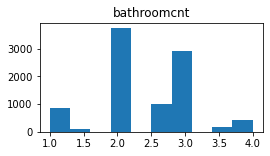

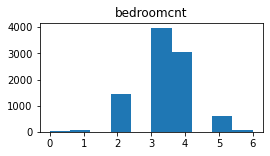

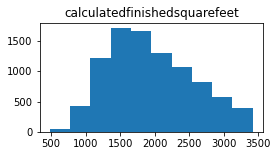

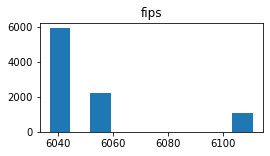

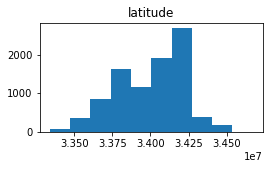

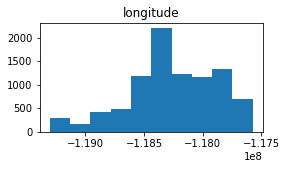

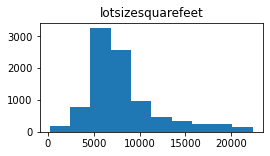

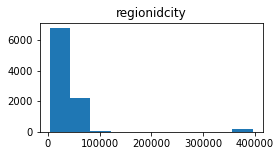

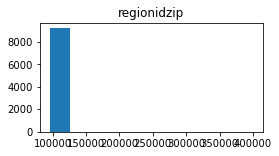

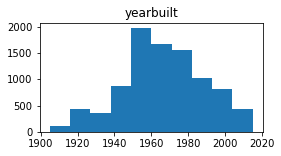

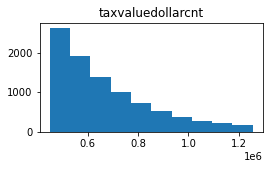

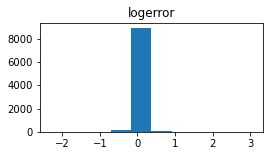

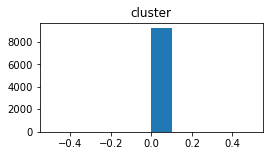

In [28]:
# graphing each colum seperately
for col in train.columns:
    #graph size
    plt.figure(figsize=(4,2))
    #histogram graph
    plt.hist(train[col])
    #title of column
    plt.title(col)
    # show graph
    plt.show()

### Takeaways:
- logerror, yearbuilt, calculatedsquarefeet, bedroom and bathroom tend to have a skew to the right.
- using this info we will run a simple correlation test.

---

***
### Is there a correlation between bathroomcnt & logerror ?
- Null Hypothesis  = there is no correlation between the bathroomcnt of a home and logerror

- Alternative Hypothesis  = there is a correlation between the bathroomcnt of a home and logerror

<AxesSubplot:xlabel='bathroomcnt', ylabel='logerror'>

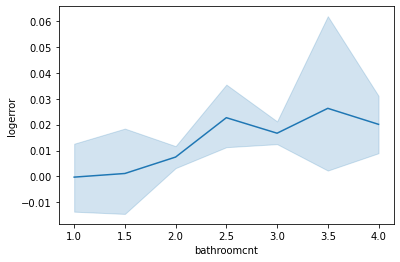

In [29]:
# lineplot to Visualize correlation
sns.lineplot(data=train, x = 'bathroomcnt' ,y="logerror")

Is there a relationship
between bathroomcnt and logerror?


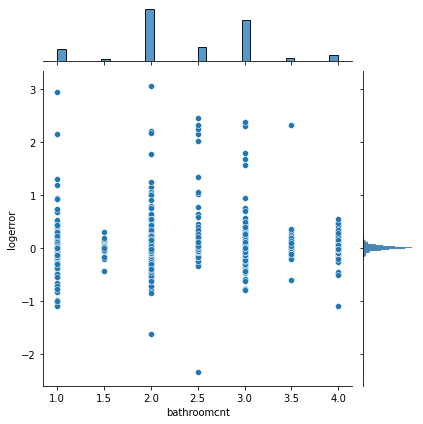

In [30]:
print("Is there a relationship\nbetween bathroomcnt and logerror?")
# graph correlation using jointplot
sns.jointplot(x="bathroomcnt", y="logerror", data=train)
# x label
plt.xlabel("bathroomcnt")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [31]:
#set the alpha to .05
alpha = .05
# corralation test between bathroomcnt and logerror
corr, p = stats.pearsonr(train.bathroomcnt, train.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.04148349941734311 , p value: 6.720563941832484e-05
Pvalue is: 6.720563941832484e-05 is less than alpha: 0.05
Reject the null hypothesis because there is a correlation present


### Takeaways:
- Based on the line graph above we can see that the range of log error increases when the bathroomcnt is more then 3 bathroomcnt.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between bathroomcnt and logerror. 

---

***
### Is there a correlation between calculatedfinishedsquarefeet & logerror ?
- Null Hypothesis  = there is no correlation between the calculatedfinishedsquarefeet of a home and logerror

- Alternative Hypothesis  = there is a correlation between the calculatedfinishedsquarefeet of a home and logerror

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

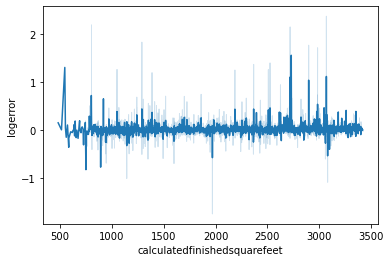

In [32]:
# lineplot to Visualize correlation
sns.lineplot(data=train, x = 'calculatedfinishedsquarefeet' ,y="logerror")

Is there a relationship
between calculatedfinishedsquarefeet and logerror?


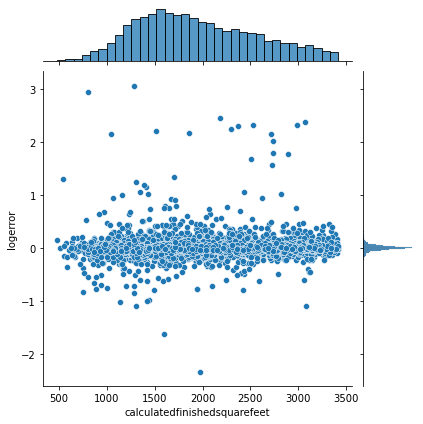

In [33]:
print("Is there a relationship\nbetween calculatedfinishedsquarefeet and logerror?")
# graph correlation using jointplot
sns.jointplot(x="calculatedfinishedsquarefeet", y="logerror", data=train)
# x label
plt.xlabel("calculatedfinishedsquarefeet")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [34]:
#set the alpha to .05
alpha = .05
# corralation test between calculatedfinishedsquarefeet and logerror
corr, p = stats.pearsonr(train.calculatedfinishedsquarefeet, train.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.05722620233957408 , p value: 3.781658822475098e-08
Pvalue is: 3.781658822475098e-08 is less than alpha: 0.05
Reject the null hypothesis because there is a correlation present


### Takeaways:
- From the line graph above we can see that the range of log error increases when the calculatedfinishedsquarefeet is less than 1000 and greater then 2800 roughly.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between calculatedfinishedsquarefeet and logerror. 

---

***
### Is there a correlation between bedroomcnt & logerror ?
- Null Hypothesis  = there is no correlation between the bedroomcnt  of a home and logerror

- Alternative Hypothesis  = there is a correlation between the bedroomcnt  of a home and logerror

<AxesSubplot:xlabel='bedroomcnt', ylabel='logerror'>

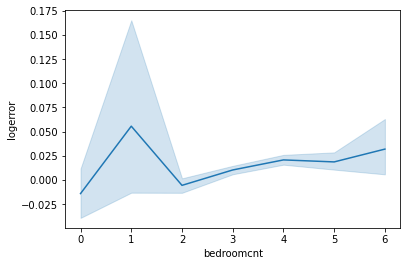

In [35]:
# lineplot to Visualize correlation
sns.lineplot(data=train, x = 'bedroomcnt' ,y="logerror")

Is there a relationship
between bedroomcnt and logerror?


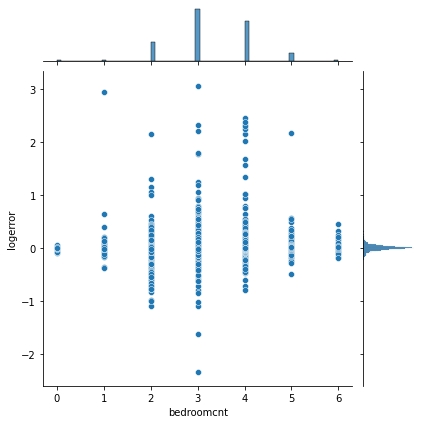

In [36]:
print("Is there a relationship\nbetween bedroomcnt and logerror?")
# graph correlation using jointplot
sns.jointplot(x="bedroomcnt", y="logerror", data=train)
# x label
plt.xlabel("bedroom cnt")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [37]:
#set the alpha to .05
alpha = .05
# corralation test between bedroomcnt and logerror
corr, p = stats.pearsonr(train.bedroomcnt, train.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.049733584874437305 , p value: 1.7565910694669815e-06
Pvalue is: 1.7565910694669815e-06 is less than alpha: 0.05
Reject the null hypothesis because there is a correlation present


### Takeaways:
- Based on the line graph above we can see that the range of log error increases when the bedroomcnt is less than 2 and greater 5.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between bedroomcnt and logerror. 

---

---
### Is there a correlation between yearbuilt & logerror ?
- Null Hypothesis  = there is no correlation between the yearbuilt  of a home and logerror

- Alternative Hypothesis  = there is a correlation between the yearbuilt  of a home and logerror

<AxesSubplot:xlabel='yearbuilt', ylabel='logerror'>

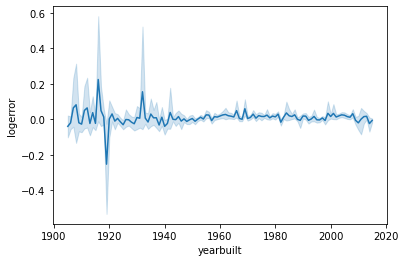

In [38]:
# lineplot to Visualize correlation
sns.lineplot(data=train, x = 'yearbuilt' ,y="logerror")

Is there a relationship
between yearbuilt and logerror?


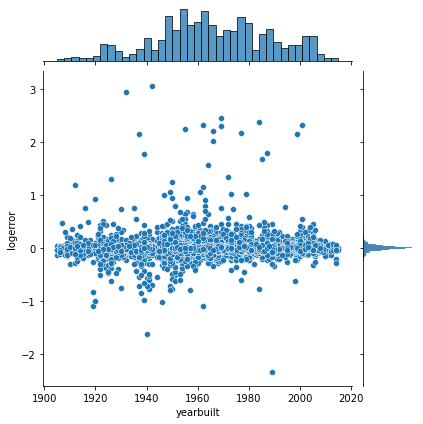

In [39]:
print("Is there a relationship\nbetween yearbuilt and logerror?")
# graph correlation using jointplot
sns.jointplot(x="yearbuilt", y="logerror", data=train)
# x label
plt.xlabel("yearbuilt")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [40]:
#set the alpha to .05
alpha = .05
# corralation test with sq ft yearbuilt and logerror
corr, p = stats.pearsonr(train.yearbuilt, train.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.04014212855719274 , p value: 0.00011479862675803841
Pvalue is: 0.00011479862675803841 is less than alpha: 0.05
Reject the null hypothesis because there is a correlation present


### Takeaways:
- Based on the line graph above we can see that the range of log error increases when the yearbuilt is before 1940s.
- After running a corralation test We reject the null hypothesis because there is significant correlation present. 

---

***
### Is there a correlation between fips & logerror ?
- Null Hypothesis  = there is no correlation between the fips  of a home and logerror

- Alternative Hypothesis  = there is a correlation between the fips  of a home and logerror

<AxesSubplot:xlabel='fips', ylabel='logerror'>

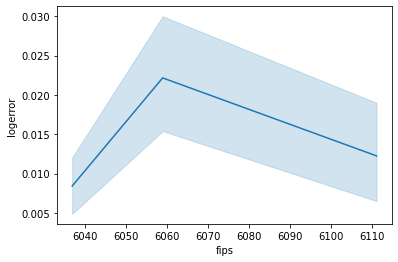

In [41]:
# lineplot to Visualize correlation
sns.lineplot(data=train, x = 'fips' ,y="logerror")

Is there a relationship
between fips and logerror?


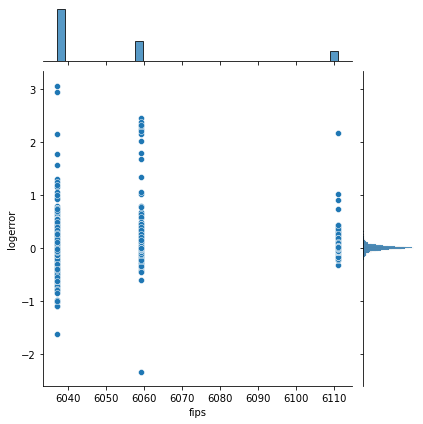

In [42]:
print("Is there a relationship\nbetween fips and logerror?")
# graph correlation using jointplot
sns.jointplot(x="fips", y="logerror", data=train)
# x label
plt.xlabel("fips")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [43]:
#set the alpha to .05
alpha = .05
# corralation fips and logerror
corr, p = stats.pearsonr(train.fips, train.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.015431037787808317 , p value: 0.13830015991204564
Pvalue is: 0.13830015991204564 is greater than alpha: 0.05
We fail to reject the null hypothesis because there is no significant correlation present


### Takeaways:
- Based on the correlation test above fips and log error have no correlation.

***

***
### Is there a correlation between taxvaluedollarcnt & logerror ?
- Null Hypothesis  = there is no correlation between the taxvaluedollarcnt  of a home and logerror

- Alternative Hypothesis  = there is a correlation between the taxvaluedollarcnt  of a home and logerror

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='logerror'>

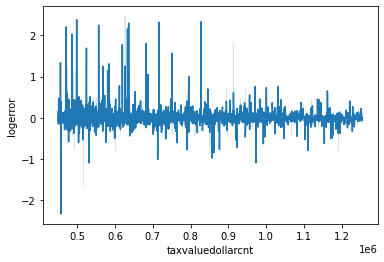

In [44]:
# lineplot to Visualize correlation
sns.lineplot(data=train, x = 'taxvaluedollarcnt' ,y="logerror")

Is there a relationship
between taxvaluedollarcnt and logerror?


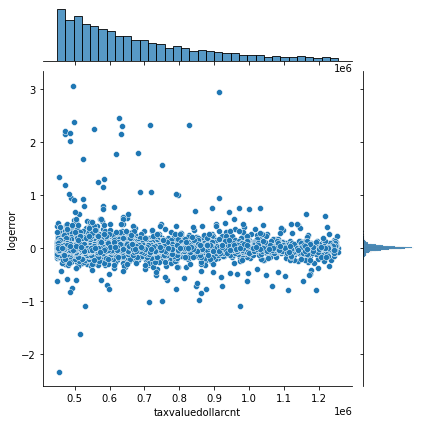

In [45]:
print("Is there a relationship\nbetween taxvaluedollarcnt and logerror?")
# graph correlation using jointplot
sns.jointplot(x="taxvaluedollarcnt", y="logerror", data=train)
# x label
plt.xlabel("taxvaluedollarcnt")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [46]:
#set the alpha to .05
alpha = .05
# corralation taxvaluedollarcnt and logerror
corr, p = stats.pearsonr(train.taxvaluedollarcnt, train.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: -0.015789722400721906 , p value: 0.1293659999780101
Pvalue is: 0.1293659999780101 is greater than alpha: 0.05
We fail to reject the null hypothesis because there is no significant correlation present


### Takeaways:
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between taxvaluedollarcnt and logerror. 
***

## Exploration Summary for Cluster 1
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between bathroomcnt and logerror.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between calculatedfinishedsquarefeet and logerror.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between bedroomcnt and logerror.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between yearbuilt and logerror.
- Based on the correlation test above fips and log error have no correlation.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between taxvaluedollarcnt and logerror.

---

# Modeling:

In [47]:
# looking at the head info for train data set
train

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
19904,2.0,2.0,1266.0,6037.0,33959079.0,-118438909.0,5400.0,12447.0,96129.0,1953.0,944000.0,0.148924,0
10955,3.0,4.0,2841.0,6037.0,34137641.0,-117830115.0,10485.0,11626.0,96486.0,1959.0,507358.0,0.014979,0
46639,3.0,5.0,2760.0,6111.0,34264430.0,-118867445.0,8646.0,25974.0,97097.0,1985.0,460766.0,-0.018784,0
45902,1.0,3.0,1219.0,6037.0,33837831.0,-118095892.0,5257.0,12292.0,96213.0,1953.0,465000.0,0.026445,0
55650,3.0,3.0,1923.0,6037.0,34065600.0,-118409000.0,17997.0,10389.0,96088.0,2002.0,566504.0,-0.112036,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
26959,3.0,5.0,2573.0,6111.0,34209435.0,-118881200.0,14408.0,34278.0,96383.0,1969.0,517569.0,0.026809,0
14525,3.0,4.0,2210.0,6059.0,33719108.0,-117921771.0,7250.0,8384.0,97008.0,1973.0,802047.0,0.009141,0
45375,2.0,3.0,1895.0,6037.0,34153603.0,-117953027.0,15772.0,24435.0,399675.0,1962.0,719700.0,-0.014332,0
6171,2.0,2.0,1287.0,6059.0,33619592.0,-117642335.0,3161.0,12773.0,96996.0,1973.0,509294.0,0.154019,0


In [48]:
#features well be working with
features = ['bathroomcnt',
                 'bedroomcnt',
                 'calculatedfinishedsquarefeet',
                 'yearbuilt',
                 'taxvaluedollarcnt',
                 'latitude', 
                 'longitude',
                 'lotsizesquarefeet',
                 'regionidcity',
                 'regionidzip',
                 'fips']
#columns we will be scaling
scale_columns = ['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet','logerror']

X_train = train[['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet']]
y_train = train['logerror']


X_validate = validate[['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet']]
y_validate = validate['logerror']


X_test = test[['yearbuilt',
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet']]
y_test = test['logerror']

def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [49]:

scaler, X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, X_validate, X_test, return_scaler=True)

In [50]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values.
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
# 1. Predict logerror_pred_mean
logerror_pred_mean = y_train.logerror.mean()
# creating a logerror_pred_mean column for my y_train
y_train['logerror_pred_mean'] = y_train.logerror.mean()
# creating a logerror_pred_mean column for my y_validate
y_validate['logerror_pred_mean'] = y_validate.logerror.mean()
# 2. compute logerror_pred_median
# creating a predictive median for y train 
y_train['logerror_pred_median'] = y_train.logerror.median()
# creating a predictive median for y_validate
y_validate['logerror_pred_median'] = y_validate.logerror.median()
# 3. RMSE of logerror_pred_mean
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_mean)**(1/2)
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2),
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))
# 4. RMSE of logerror_pred_median
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_median)**(1/2)
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2),
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  0.15 
Validate/Out-of-Sample:  0.16
RMSE using Median
Train/In-Sample:  0.15 
Validate/Out-of-Sample:  0.16


In [51]:
#predicting y from trained data
#predict rules
model = LinearRegression().fit(X_train_scaled, y_train)
predictions = model.predict(X_train_scaled)

In [52]:
y_test = pd.DataFrame(y_test)

y_test

,logerror
69445,0.011348
5761,0.060818
14864,0.027245
18728,-0.051381
29589,0.041423
...,...
774,0.052311
19654,-0.038067
18546,0.019033
51612,-0.004889


### LinearRegression (ols)

In [53]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled, y_train.logerror)

# predict train
y_train['logerror_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm)**(1/2)

# predict validate
y_validate['logerror_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.14557532321156097 
Validation/Out-of-Sample:  0.1643138697953955


In [54]:
#residuals
y_train['lm_residuals'] = y_train['logerror_pred_lm'] - y_train['logerror']
y_validate['lm_residuals'] = y_validate['logerror_pred_lm'] - y_validate['logerror']

### LassoLars (lars)

In [55]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train_scaled, y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars)**(1/2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_lars, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  0.14592441738171597 
Validation/Out-of-Sample:  0.16462810317026078


In [56]:
#residuals
y_train['lars_residuals'] = y_train['logerror_pred_lars'] - y_train['logerror']
y_validate['lars_residuals'] = y_validate['logerror_pred_lars'] - y_validate['logerror']


### Polynomial Regression

In [57]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

In [58]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.logerror)

# predict train
y_train['logerror_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm2)**(1/2)

# predict validate
y_validate['logerror_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.14557532321156097 
Validation/Out-of-Sample:  0.1645191056179168


In [59]:
#residuals
y_train['poly_residuals'] = y_train['logerror_pred_lm2'] - y_train['logerror']
y_validate['poly_residuals'] = y_validate['logerror_pred_lm2'] - y_validate['logerror']

<div class="alert alert-block alert-info">
<b>Cluster number:</b>  2
</div>

# <span style="color:blue">Split Data:</span>

In [60]:
# get train to expolore 
train2, validate2, test2 = wrangle.split(cluster2)
# seeing what the train split dataset
train2.info()

Train: 19862 rows, 13 cols
Validate: 4966 rows, 13 cols
Test: 4382 rows, 13 cols
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19862 entries, 63023 to 10318
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   19862 non-null  float64
 1   bedroomcnt                    19862 non-null  float64
 2   calculatedfinishedsquarefeet  19862 non-null  float64
 3   fips                          19862 non-null  float64
 4   latitude                      19862 non-null  float64
 5   longitude                     19862 non-null  float64
 6   lotsizesquarefeet             19862 non-null  float64
 7   regionidcity                  19862 non-null  float64
 8   regionidzip                   19862 non-null  float64
 9   yearbuilt                     19862 non-null  float64
 10  taxvaluedollarcnt             19862 non-null  float64
 11  logerror                      1986

In [61]:
#train sample
train2

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
63023,2.0,3.0,1909.0,6037.0,34643208.0,-118230998.0,10200.0,5534.0,97319.0,1970.0,193414.0,0.068977,1
23746,2.0,4.0,1833.0,6059.0,33823062.0,-117876762.0,7725.0,16764.0,97025.0,1962.0,418809.0,-0.015528,1
32922,2.0,3.0,1313.0,6037.0,34697165.0,-118104936.0,9487.0,5534.0,97318.0,1990.0,93619.0,-0.027203,1
50980,2.5,4.0,2054.0,6059.0,33739980.0,-117974469.0,6100.0,34780.0,96990.0,1959.0,309663.0,-0.020591,1
19014,1.0,3.0,1062.0,6037.0,34196955.0,-118554818.0,6032.0,12447.0,96364.0,1951.0,316212.0,-0.023401,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48140,2.5,4.0,2041.0,6059.0,33935342.0,-117913591.0,13188.0,17150.0,97035.0,1957.0,265781.0,0.028972,1
54079,2.0,3.0,1286.0,6037.0,33849772.0,-118252964.0,4626.0,10723.0,96230.0,1970.0,326748.0,0.006161,1
13549,1.0,3.0,1374.0,6037.0,33951978.0,-118079813.0,5489.0,13716.0,96201.0,1951.0,56074.0,0.006252,1
8552,2.5,4.0,2138.0,6059.0,33511644.0,-117639959.0,5225.0,33840.0,96985.0,1975.0,319246.0,0.094903,1


In [62]:
#validate sample
validate2

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
4311,1.0,2.0,1060.0,6037.0,33810530.0,-118216911.0,6126.0,46298.0,96244.0,1948.0,365489.0,0.047296,1
44873,2.0,4.0,1620.0,6037.0,34049193.0,-117929857.0,9357.0,14542.0,96523.0,1960.0,67671.0,0.109234,1
38440,1.0,3.0,1246.0,6037.0,33944491.0,-118319260.0,6055.0,45888.0,96135.0,1946.0,46588.0,0.002465,1
36591,2.5,3.0,1893.0,6059.0,33757239.0,-117852630.0,6240.0,47568.0,97001.0,1977.0,194269.0,0.025353,1
1047,1.0,2.0,1084.0,6037.0,34013472.0,-118297621.0,6749.0,12447.0,96018.0,1921.0,33915.0,0.091424,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51343,2.0,3.0,2644.0,6037.0,34157236.0,-118075805.0,14790.0,47019.0,96295.0,1950.0,127946.0,0.043054,1
1740,2.0,3.0,1065.0,6037.0,34672828.0,-118069564.0,7267.0,5534.0,97318.0,1997.0,135653.0,0.001441,1
46159,1.0,2.0,799.0,6037.0,34203109.0,-118566425.0,7000.0,12447.0,96341.0,1951.0,49404.0,0.206283,1
50248,1.5,4.0,1205.0,6059.0,33810696.0,-118034654.0,6000.0,44833.0,96185.0,1961.0,436161.0,0.033224,1


In [63]:
# test sample
test2

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
62595,2.0,3.0,1105.0,6059.0,33761775.0,-117908775.0,12144.0,24832.0,97050.0,1958.0,69957.0,-0.060884,1
24547,2.0,2.0,1680.0,6037.0,34593479.0,-118147621.0,9065.0,40227.0,97329.0,1963.0,191573.0,0.049005,1
48013,2.0,4.0,1900.0,6037.0,34205817.0,-118608218.0,6749.0,12447.0,96338.0,1954.0,335220.0,0.017966,1
9783,3.0,4.0,2444.0,6037.0,34062140.0,-118145174.0,11234.0,50677.0,96533.0,1950.0,135336.0,-0.055282,1
68191,1.0,2.0,500.0,6111.0,34418319.0,-118789971.0,5200.0,13311.0,97108.0,1939.0,9242.0,0.095752,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,3.0,3.0,1450.0,6037.0,34473748.0,-118532654.0,5235.0,54311.0,96403.0,1988.0,436556.0,0.002202,1
6855,2.0,3.0,1783.0,6037.0,34006915.0,-118344854.0,9008.0,12447.0,95989.0,1955.0,89219.0,-0.030367,1
49446,2.0,3.0,1241.0,6037.0,34273611.0,-118475840.0,6900.0,12447.0,96370.0,1956.0,59875.0,0.003754,1
1127,2.0,2.0,1265.0,6037.0,34147700.0,-118421000.0,16631.0,12447.0,96449.0,1988.0,191907.0,-0.038751,1


***
***

# <span style="color:blue">Exploration for model 2
   :</span>
###  ? Does logerror differ across bathroomcnt, bedroomcnt, calculatedfinishedsquarefeet, yearbuilt, & taxvaluedollarcnt ?

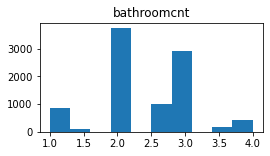

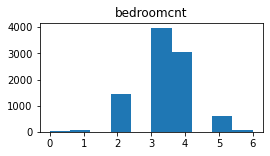

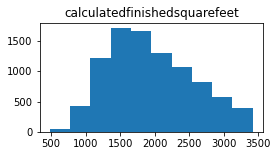

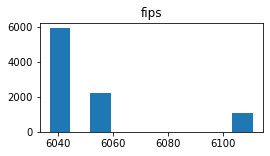

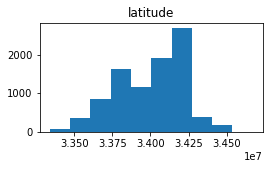

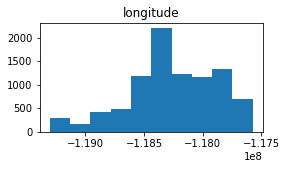

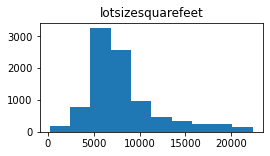

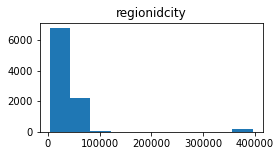

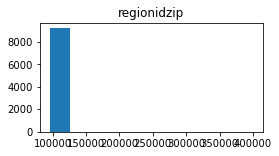

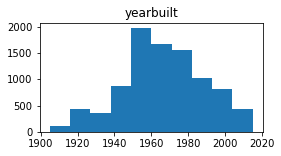

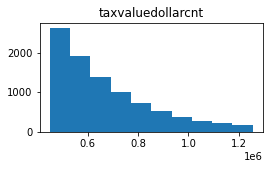

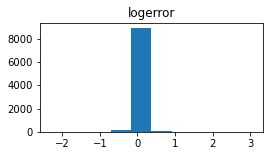

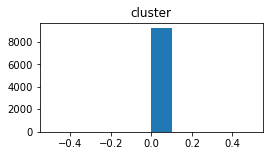

In [64]:
# graphing each colum seperately
for col in train2.columns:
    #graph size
    plt.figure(figsize=(4,2))
    #histogram graph
    plt.hist(train[col])
    #title of column
    plt.title(col)
    # show graph
    plt.show()

### Takeaways:
- logerror, yearbuilt, calculatedsquarefeet, bedroom and bathroom tend to have a skew to the right.
- using this info we will run a simple correlation test.

***
***
### Is there a correlation between bathroomcnt & logerror ?
- Null Hypothesis  = there is no correlation between the bathroomcnt of a home and logerror

- Alternative Hypothesis  = there is a correlation between the bathroomcnt of a home and logerror

<AxesSubplot:xlabel='bathroomcnt', ylabel='logerror'>

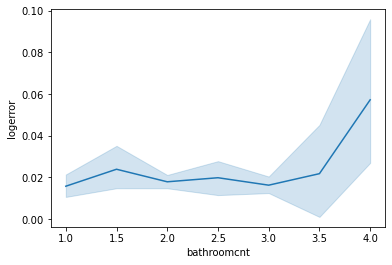

In [65]:
# lineplot to Visualize correlation
sns.lineplot(data=train2, x = 'bathroomcnt' ,y="logerror")

Is there a relationship
between bathroomcnt and logerror?


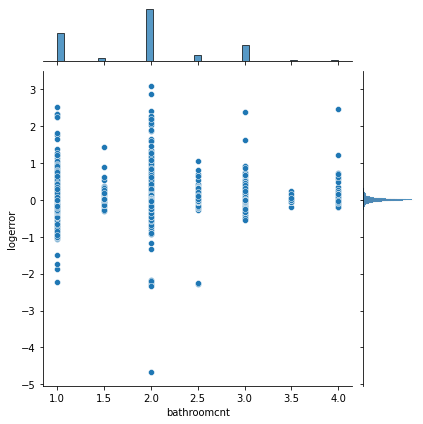

In [66]:
print("Is there a relationship\nbetween bathroomcnt and logerror?")
# graph correlation using jointplot
sns.jointplot(x="bathroomcnt", y="logerror", data=train2)
# x label
plt.xlabel("bathroomcnt")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [67]:
#set the alpha to .05
alpha = .05
# corralation test between bathroomcnt and logerror
corr, p = stats.pearsonr(train2.bathroomcnt, train2.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.009055797596068707 , p value: 0.20188376296185478
Pvalue is: 0.20188376296185478 is greater than alpha: 0.05
We fail to reject the null hypothesis because there is no significant correlation present


### Takeaways:
- Based on the line graph above we can see that the range of log error increases when the bathroomcnt is more then 2 bathroomcnt.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between bathroomcnt and logerror. 

***
***

### Is there a correlation between calculatedfinishedsquarefeet & logerror ?
- Null Hypothesis  = there is no correlation between the calculatedfinishedsquarefeet of a home and logerror

- Alternative Hypothesis  = there is a correlation between the calculatedfinishedsquarefeet of a home and logerror

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

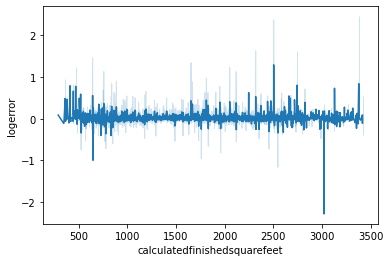

In [68]:
# lineplot to Visualize correlation
sns.lineplot(data=train2, x = 'calculatedfinishedsquarefeet' ,y="logerror")

Is there a relationship
between calculatedfinishedsquarefeet and logerror?


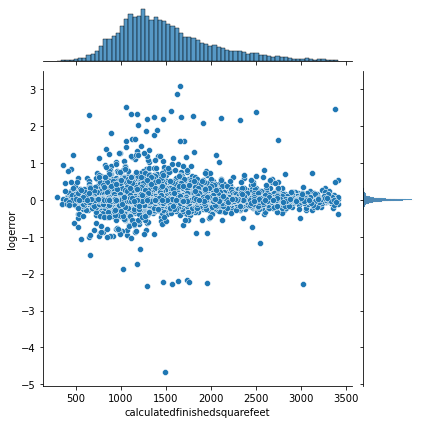

In [69]:
print("Is there a relationship\nbetween calculatedfinishedsquarefeet and logerror?")
# graph correlation using jointplot
sns.jointplot(x="calculatedfinishedsquarefeet", y="logerror", data=train2)
# x label
plt.xlabel("calculatedfinishedsquarefeet")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [70]:
#set the alpha to .05
alpha = .05
# corralation test between calculatedfinishedsquarefeet and logerror
corr, p = stats.pearsonr(train2.calculatedfinishedsquarefeet, train2.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.0072672844858160555 , p value: 0.30576612204824655
Pvalue is: 0.30576612204824655 is greater than alpha: 0.05
We fail to reject the null hypothesis because there is no significant correlation present


### Takeaways:
- From the line graph above we can see that the range of log error increases when the calculatedfinishedsquarefeet is less than 700 and greater then 2800 roughly.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between calculatedfinishedsquarefeet and logerror. 

***
***

### Is there a correlation between bedroomcnt & logerror ?
- Null Hypothesis  = there is no correlation between the bedroomcnt  of a home and logerror

- Alternative Hypothesis  = there is a correlation between the bedroomcnt  of a home and logerror

<AxesSubplot:xlabel='bedroomcnt', ylabel='logerror'>

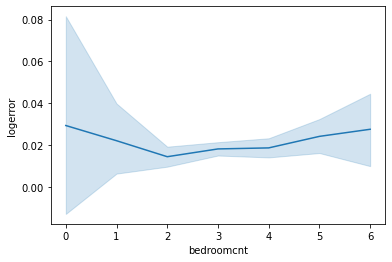

In [71]:
# lineplot to Visualize correlation
sns.lineplot(data=train2, x = 'bedroomcnt' ,y="logerror")

Is there a relationship
between bedroomcnt and logerror?


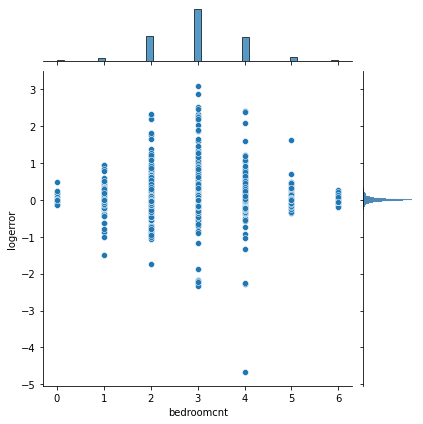

In [72]:
print("Is there a relationship\nbetween bedroomcnt and logerror?")
# graph correlation using jointplot
sns.jointplot(x="bedroomcnt", y="logerror", data=train2)
# x label
plt.xlabel("bedroom cnt")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [73]:
#set the alpha to .05
alpha = .05
# corralation test between bedroomcnt and logerror
corr, p = stats.pearsonr(train2.bedroomcnt, train2.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.009050405972709237 , p value: 0.20215243011302414
Pvalue is: 0.20215243011302414 is greater than alpha: 0.05
We fail to reject the null hypothesis because there is no significant correlation present


### Takeaways:
- Based on the line graph above we can see that the range of log error increases when the bedroomcnt is less than 2 and greater 5.
- After running a corralation test we can reject the null hypothesis and prove that there is correlation between bedroomcnt and logerror. 

***
***

### Is there a correlation between yearbuilt & logerror ?
- Null Hypothesis  = there is no correlation between the yearbuilt  of a home and logerror

- Alternative Hypothesis  = there is a correlation between the yearbuilt  of a home and logerror

<AxesSubplot:xlabel='yearbuilt', ylabel='logerror'>

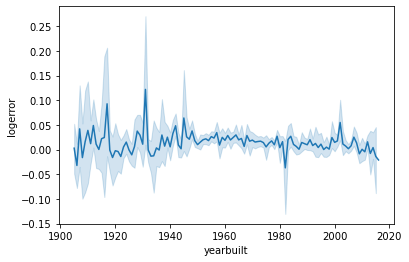

In [74]:
# lineplot to Visualize correlation
sns.lineplot(data=train2, x = 'yearbuilt' ,y="logerror")

Is there a relationship
between yearbuilt and logerror?


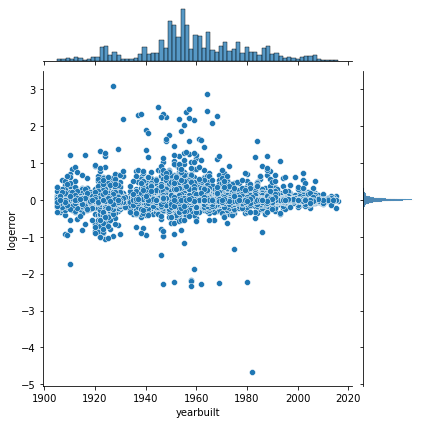

In [75]:
print("Is there a relationship\nbetween yearbuilt and logerror?")
# graph correlation using jointplot
sns.jointplot(x="yearbuilt", y="logerror", data=train2)
# x label
plt.xlabel("yearbuilt")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [76]:
#set the alpha to .05
alpha = .05
# corralation test with sq ft yearbuilt and logerror
corr, p = stats.pearsonr(train2.yearbuilt, train2.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: -0.004778924578223955 , p value: 0.5006497518306097
Pvalue is: 0.5006497518306097 is greater than alpha: 0.05
We fail to reject the null hypothesis because there is no significant correlation present


### Takeaways:
- Based on the line graph above we can see that the range of log error increases when the yearbuilt is before 1940s.
- After running a corralation test We reject the null hypothesis because there is significant correlation with year built and logerror present. 

***
***


### Is there a correlation between fips & logerror ?
- Null Hypothesis  = there is no correlation between the fips  of a home and logerror

- Alternative Hypothesis  = there is a correlation between the fips  of a home and logerror

<AxesSubplot:xlabel='fips', ylabel='logerror'>

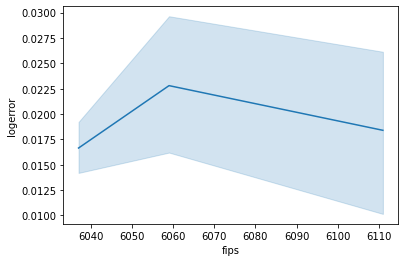

In [77]:
# lineplot to Visualize correlation
sns.lineplot(data=train2, x = 'fips' ,y="logerror")

Is there a relationship
between fips and logerror?


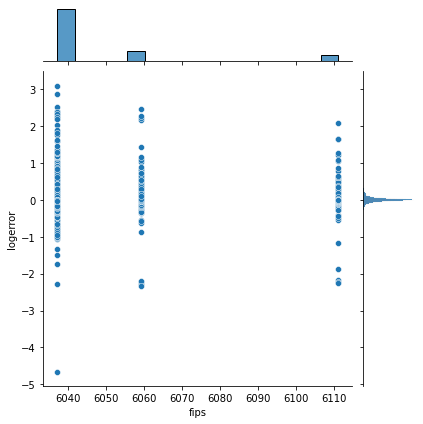

In [78]:
print("Is there a relationship\nbetween fips and logerror?")
# graph correlation using jointplot
sns.jointplot(x="fips", y="logerror", data=train2)
# x label
plt.xlabel("fips")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [79]:
#set the alpha to .05
alpha = .05
# corralation fips and logerror
corr, p = stats.pearsonr(train2.fips, train2.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.006021081426047747 , p value: 0.3961478859346407
Pvalue is: 0.3961478859346407 is greater than alpha: 0.05
We fail to reject the null hypothesis because there is no significant correlation present


### Takeaways:
- Based on the correlation test above fips and log error have no correlation.

***
***

### Is there a correlation between taxvaluedollarcnt & logerror ?
- Null Hypothesis  = there is no correlation between the taxvaluedollarcnt  of a home and logerror

- Alternative Hypothesis  = there is a correlation between the taxvaluedollarcnt  of a home and logerror

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='logerror'>

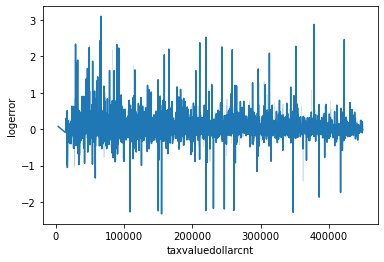

In [80]:
# lineplot to Visualize correlation
sns.lineplot(data=train2, x = 'taxvaluedollarcnt' ,y="logerror")

Is there a relationship
between taxvaluedollarcnt and logerror?


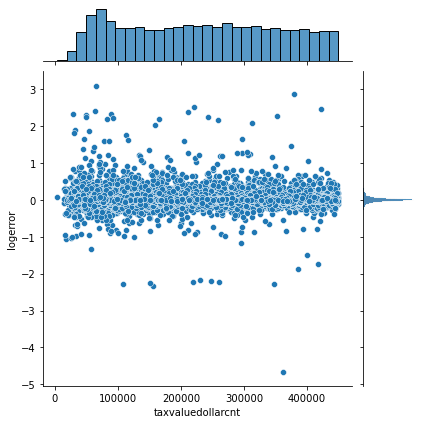

In [81]:
print("Is there a relationship\nbetween taxvaluedollarcnt and logerror?")
# graph correlation using jointplot
sns.jointplot(x="taxvaluedollarcnt", y="logerror", data=train2)
# x label
plt.xlabel("taxvaluedollarcnt")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [82]:
#set the alpha to .05
alpha = .05
# corralation taxvaluedollarcnt and logerror
corr, p = stats.pearsonr(train2.taxvaluedollarcnt, train2.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: -0.035451782108029906 , p value: 5.80577128513973e-07
Pvalue is: 5.80577128513973e-07 is less than alpha: 0.05
Reject the null hypothesis because there is a correlation present


### Takeaways:
- After running a corralation test We fail to reject the null hypothesis because there is no significant correlation present. 
***

## Exploration Summary for Cluster 2
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between bathroomcnt and logerror.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between calculatedfinishedsquarefeet and logerror.
- After running a corralation test we can reject the null hypothesis and prove that there is correlation between bedroomcnt and logerror.
- After running a corralation test We reject the null hypothesis because there is significant correlation with year built and logerror present.
- Based on the correlation test above fips and log error have no correlation.
- After running a corralation test We fail to reject the null hypothesis because there is no significant correlation between taxvaluedollarcnt anf logerror present. 

***
***

# Modeling Cluster 2:

In [83]:
train = train2
validate = validate2
test = test2

In [84]:

#features well be working with
features = ['bathroomcnt',
                 'bedroomcnt',
                 'calculatedfinishedsquarefeet',
                 'yearbuilt',
                 'taxvaluedollarcnt',
                 'latitude', 
                 'longitude',
                 'lotsizesquarefeet',
                 'regionidcity',
                 'regionidzip',
                 'fips']
#columns we will be scaling
scale_columns = ['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet','logerror']

X_train = train2[['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet']]
y_train = train2['logerror']


X_validate = validate2[['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet']]
y_validate = validate2['logerror']


X_test = test2[['yearbuilt',
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet']]
y_test = test2['logerror']

def scale_data(train2, 
               validate2, 
               test2, 
               columns_to_scale=['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    train_scaled = train2.copy()
    validate_scaled = validate2.copy()
    test_scaled = test2.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train2[columns_to_scale]),
                                                  columns=train2[columns_to_scale].columns.values).set_index([train2.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate2[columns_to_scale]),
                                                  columns=validate2[columns_to_scale].columns.values).set_index([validate2.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test2[columns_to_scale]),
                                                 columns=test2[columns_to_scale].columns.values).set_index([test2.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [85]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, X_validate, X_test, return_scaler=True)

In [86]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values.
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
# 1. Predict logerror_pred_mean
logerror_pred_mean = y_train.logerror.mean()
# creating a logerror_pred_mean column for my y_train
y_train['logerror_pred_mean'] = y_train.logerror.mean()
# creating a logerror_pred_mean column for my y_validate
y_validate['logerror_pred_mean'] = y_validate.logerror.mean()
# 2. compute logerror_pred_median
# creating a predictive median for y train 
y_train['logerror_pred_median'] = y_train.logerror.median()
# creating a predictive median for y_validate
y_validate['logerror_pred_median'] = y_validate.logerror.median()
# 3. RMSE of logerror_pred_mean
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_mean)**(1/2)
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2),
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))
# 4. RMSE of logerror_pred_median
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_median)**(1/2)
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2),
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  0.16 
Validate/Out-of-Sample:  0.17
RMSE using Median
Train/In-Sample:  0.16 
Validate/Out-of-Sample:  0.17


In [87]:
#predicting y from trained data
#predict rules
model = LinearRegression().fit(X_train_scaled, y_train)
predictions = model.predict(X_train_scaled)

In [88]:
y_test = pd.DataFrame(y_test)

y_test

,logerror
62595,-0.060884
24547,0.049005
48013,0.017966
9783,-0.055282
68191,0.095752
...,...
19224,0.002202
6855,-0.030367
49446,0.003754
1127,-0.038751


### LinearRegression (ols)

In [89]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled, y_train.logerror)

# predict train
y_train['logerror_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm)**(1/2)

# predict validate
y_validate['logerror_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.16204035701067623 
Validation/Out-of-Sample:  0.1662390920154774


In [90]:
#residuals
y_train['lm_residuals'] = y_train['logerror_pred_lm'] - y_train['logerror']
y_validate['lm_residuals'] = y_validate['logerror_pred_lm'] - y_validate['logerror']


### LassoLars (lars)

In [91]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train_scaled, y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars)**(1/2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_lars, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  0.16216826562110584 
Validation/Out-of-Sample:  0.1663646528910004


In [92]:
#residuals
y_train['lars_residuals'] = y_train['logerror_pred_lars'] - y_train['logerror']
y_validate['lars_residuals'] = y_validate['logerror_pred_lars'] - y_validate['logerror']


### Polynomial Regression

In [93]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

In [94]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.logerror)

# predict train
y_train['logerror_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm2)**(1/2)

# predict validate
y_validate['logerror_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.16204035701067623 
Validation/Out-of-Sample:  0.16656891596675277


In [95]:
#residuals
y_train['poly_residuals'] = y_train['logerror_pred_lm2'] - y_train['logerror']
y_validate['poly_residuals'] = y_validate['logerror_pred_lm2'] - y_validate['logerror']

<div class="alert alert-block alert-info">
<b>Cluster number:</b>  3
</div>

In [96]:
# get train to expolore 
train, validate, test = wrangle.split(cluster2)
# seeing what the train split dataset
train.info()

Train: 19862 rows, 13 cols
Validate: 4966 rows, 13 cols
Test: 4382 rows, 13 cols
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19862 entries, 63023 to 10318
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bathroomcnt                   19862 non-null  float64
 1   bedroomcnt                    19862 non-null  float64
 2   calculatedfinishedsquarefeet  19862 non-null  float64
 3   fips                          19862 non-null  float64
 4   latitude                      19862 non-null  float64
 5   longitude                     19862 non-null  float64
 6   lotsizesquarefeet             19862 non-null  float64
 7   regionidcity                  19862 non-null  float64
 8   regionidzip                   19862 non-null  float64
 9   yearbuilt                     19862 non-null  float64
 10  taxvaluedollarcnt             19862 non-null  float64
 11  logerror                      1986

In [97]:
#train sample
train

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
63023,2.0,3.0,1909.0,6037.0,34643208.0,-118230998.0,10200.0,5534.0,97319.0,1970.0,193414.0,0.068977,1
23746,2.0,4.0,1833.0,6059.0,33823062.0,-117876762.0,7725.0,16764.0,97025.0,1962.0,418809.0,-0.015528,1
32922,2.0,3.0,1313.0,6037.0,34697165.0,-118104936.0,9487.0,5534.0,97318.0,1990.0,93619.0,-0.027203,1
50980,2.5,4.0,2054.0,6059.0,33739980.0,-117974469.0,6100.0,34780.0,96990.0,1959.0,309663.0,-0.020591,1
19014,1.0,3.0,1062.0,6037.0,34196955.0,-118554818.0,6032.0,12447.0,96364.0,1951.0,316212.0,-0.023401,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48140,2.5,4.0,2041.0,6059.0,33935342.0,-117913591.0,13188.0,17150.0,97035.0,1957.0,265781.0,0.028972,1
54079,2.0,3.0,1286.0,6037.0,33849772.0,-118252964.0,4626.0,10723.0,96230.0,1970.0,326748.0,0.006161,1
13549,1.0,3.0,1374.0,6037.0,33951978.0,-118079813.0,5489.0,13716.0,96201.0,1951.0,56074.0,0.006252,1
8552,2.5,4.0,2138.0,6059.0,33511644.0,-117639959.0,5225.0,33840.0,96985.0,1975.0,319246.0,0.094903,1


In [98]:
#validate sample
validate

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
4311,1.0,2.0,1060.0,6037.0,33810530.0,-118216911.0,6126.0,46298.0,96244.0,1948.0,365489.0,0.047296,1
44873,2.0,4.0,1620.0,6037.0,34049193.0,-117929857.0,9357.0,14542.0,96523.0,1960.0,67671.0,0.109234,1
38440,1.0,3.0,1246.0,6037.0,33944491.0,-118319260.0,6055.0,45888.0,96135.0,1946.0,46588.0,0.002465,1
36591,2.5,3.0,1893.0,6059.0,33757239.0,-117852630.0,6240.0,47568.0,97001.0,1977.0,194269.0,0.025353,1
1047,1.0,2.0,1084.0,6037.0,34013472.0,-118297621.0,6749.0,12447.0,96018.0,1921.0,33915.0,0.091424,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51343,2.0,3.0,2644.0,6037.0,34157236.0,-118075805.0,14790.0,47019.0,96295.0,1950.0,127946.0,0.043054,1
1740,2.0,3.0,1065.0,6037.0,34672828.0,-118069564.0,7267.0,5534.0,97318.0,1997.0,135653.0,0.001441,1
46159,1.0,2.0,799.0,6037.0,34203109.0,-118566425.0,7000.0,12447.0,96341.0,1951.0,49404.0,0.206283,1
50248,1.5,4.0,1205.0,6059.0,33810696.0,-118034654.0,6000.0,44833.0,96185.0,1961.0,436161.0,0.033224,1


In [99]:
# test sample
test

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster
62595,2.0,3.0,1105.0,6059.0,33761775.0,-117908775.0,12144.0,24832.0,97050.0,1958.0,69957.0,-0.060884,1
24547,2.0,2.0,1680.0,6037.0,34593479.0,-118147621.0,9065.0,40227.0,97329.0,1963.0,191573.0,0.049005,1
48013,2.0,4.0,1900.0,6037.0,34205817.0,-118608218.0,6749.0,12447.0,96338.0,1954.0,335220.0,0.017966,1
9783,3.0,4.0,2444.0,6037.0,34062140.0,-118145174.0,11234.0,50677.0,96533.0,1950.0,135336.0,-0.055282,1
68191,1.0,2.0,500.0,6111.0,34418319.0,-118789971.0,5200.0,13311.0,97108.0,1939.0,9242.0,0.095752,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19224,3.0,3.0,1450.0,6037.0,34473748.0,-118532654.0,5235.0,54311.0,96403.0,1988.0,436556.0,0.002202,1
6855,2.0,3.0,1783.0,6037.0,34006915.0,-118344854.0,9008.0,12447.0,95989.0,1955.0,89219.0,-0.030367,1
49446,2.0,3.0,1241.0,6037.0,34273611.0,-118475840.0,6900.0,12447.0,96370.0,1956.0,59875.0,0.003754,1
1127,2.0,2.0,1265.0,6037.0,34147700.0,-118421000.0,16631.0,12447.0,96449.0,1988.0,191907.0,-0.038751,1


***
***
# <span style="color:blue">Explorarition for Cluster 3:</span>


***
### Is there a correlation between bathroomcnt & logerror ?
- Null Hypothesis  = there is no correlation between the bathroomcnt of a home and logerror

- Alternative Hypothesis  = there is a correlation between the bathroomcnt of a home and logerror

<AxesSubplot:xlabel='bathroomcnt', ylabel='logerror'>

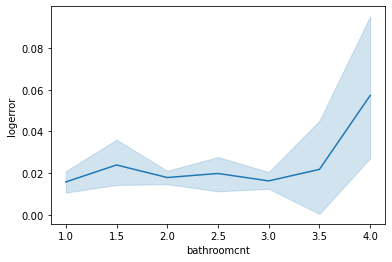

In [100]:
# lineplot to Visualize correlation
sns.lineplot(data=train, x = 'bathroomcnt' ,y="logerror")

Is there a relationship
between bathroomcnt and logerror?


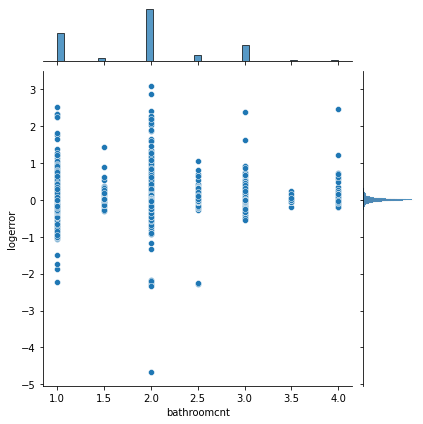

In [101]:
print("Is there a relationship\nbetween bathroomcnt and logerror?")
# graph correlation using jointplot
sns.jointplot(x="bathroomcnt", y="logerror", data=train)
# x label
plt.xlabel("bathroomcnt")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [102]:
#set the alpha to .05
alpha = .05
# corralation test between bathroomcnt and logerror
corr, p = stats.pearsonr(train.bathroomcnt, train.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.009055797596068707 , p value: 0.20188376296185478
Pvalue is: 0.20188376296185478 is greater than alpha: 0.05
We fail to reject the null hypothesis because there is no significant correlation present


### Takeaways:
- Based on the line graph above we can see that the range of log error increases when the bathroomcnt is more then 3 bathroomcnt.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between bathroomcnt and logerror. 
***
***

### Is there a correlation between calculatedfinishedsquarefeet & logerror ?
- Null Hypothesis  = there is no correlation between the calculatedfinishedsquarefeet of a home and logerror

- Alternative Hypothesis  = there is a correlation between the calculatedfinishedsquarefeet of a home and logerror

<AxesSubplot:xlabel='calculatedfinishedsquarefeet', ylabel='logerror'>

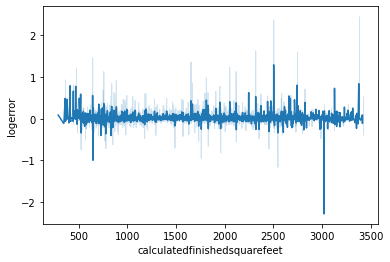

In [103]:
# lineplot to Visualize correlation
sns.lineplot(data=train, x = 'calculatedfinishedsquarefeet' ,y="logerror")

Is there a relationship
between calculatedfinishedsquarefeet and logerror?


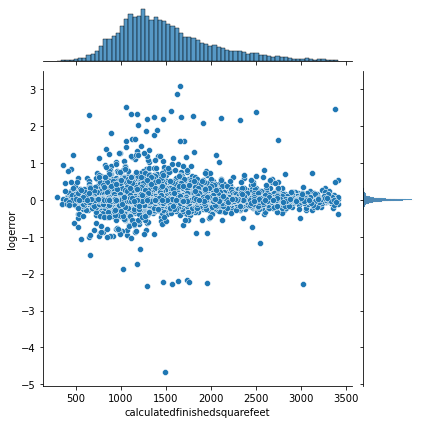

In [104]:
print("Is there a relationship\nbetween calculatedfinishedsquarefeet and logerror?")
# graph correlation using jointplot
sns.jointplot(x="calculatedfinishedsquarefeet", y="logerror", data=train)
# x label
plt.xlabel("calculatedfinishedsquarefeet")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [105]:
#set the alpha to .05
alpha = .05
# corralation test between calculatedfinishedsquarefeet and logerror
corr, p = stats.pearsonr(train.calculatedfinishedsquarefeet, train.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.0072672844858160555 , p value: 0.30576612204824655
Pvalue is: 0.30576612204824655 is greater than alpha: 0.05
We fail to reject the null hypothesis because there is no significant correlation present


### Takeaways:
- From the line graph above we can see that the range of log error increases when the calculatedfinishedsquarefeet is less than 1000 and greater then 2800 roughly.
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between calculatedfinishedsquarefeet and logerror. 

***
***
### Is there a correlation between bedroomcnt & logerror ?
- Null Hypothesis  = there is no correlation between the bedroomcnt  of a home and logerror

- Alternative Hypothesis  = there is a correlation between the bedroomcnt  of a home and logerror

<AxesSubplot:xlabel='bedroomcnt', ylabel='logerror'>

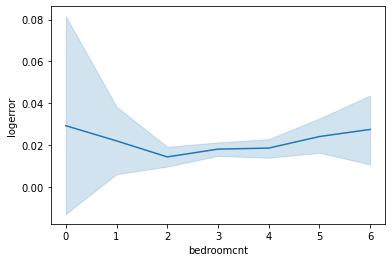

In [106]:
# lineplot to Visualize correlation
sns.lineplot(data=train, x = 'bedroomcnt' ,y="logerror")

Is there a relationship
between bedroomcnt and logerror?


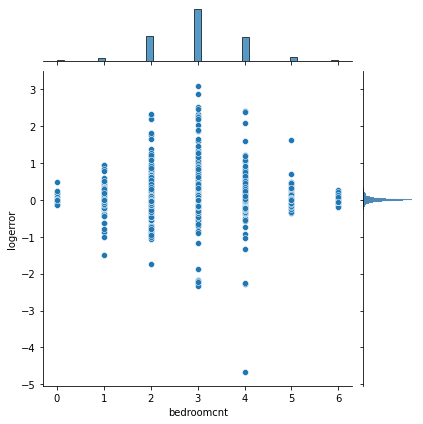

In [107]:
print("Is there a relationship\nbetween bedroomcnt and logerror?")
# graph correlation using jointplot
sns.jointplot(x="bedroomcnt", y="logerror", data=train)
# x label
plt.xlabel("bedroom cnt")
# y label
plt.ylabel("log error")
# show the graph
plt.show()


In [108]:
#set the alpha to .05
alpha = .05
# corralation test between bedroomcnt and logerror
corr, p = stats.pearsonr(train.bedroomcnt, train.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.009050405972709237 , p value: 0.20215243011302414
Pvalue is: 0.20215243011302414 is greater than alpha: 0.05
We fail to reject the null hypothesis because there is no significant correlation present


### Takeaways:
- Based on the line graph above we can see that the range of log error increases when the bedroomcnt is less than 2 and greater 5.
- After running a corralation test we reject the null hypothesis and prove that there is correlation between bedroomcnt and logerror. 

***
***
### Is there a correlation between yearbuilt & logerror ?
- Null Hypothesis  = there is no correlation between the yearbuilt  of a home and logerror

- Alternative Hypothesis  = there is a correlation between the yearbuilt  of a home and logerror

<AxesSubplot:xlabel='yearbuilt', ylabel='logerror'>

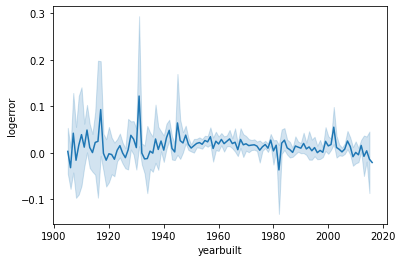

In [109]:
# lineplot to Visualize correlation
sns.lineplot(data=train, x = 'yearbuilt' ,y="logerror")

Is there a relationship
between yearbuilt and logerror?


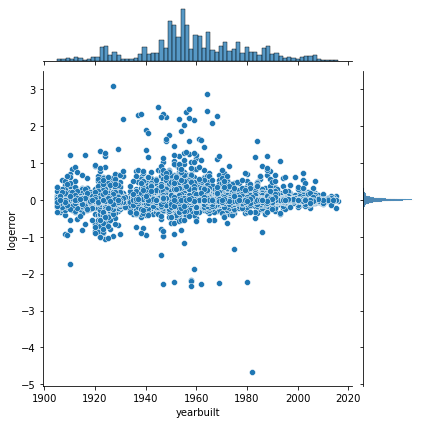

In [110]:
print("Is there a relationship\nbetween yearbuilt and logerror?")
# graph correlation using jointplot
sns.jointplot(x="yearbuilt", y="logerror", data=train)
# x label
plt.xlabel("yearbuilt")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [111]:
#set the alpha to .05
alpha = .05
# corralation test with sq ft yearbuilt and logerror
corr, p = stats.pearsonr(train.yearbuilt, train.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: -0.004778924578223955 , p value: 0.5006497518306097
Pvalue is: 0.5006497518306097 is greater than alpha: 0.05
We fail to reject the null hypothesis because there is no significant correlation present


### Takeaways:
- Based on the line graph above we can see that the range of log error increases when the yearbuilt is before 1940s.
- After running a corralation test We reject the null hypothesis because there is a significant correlation between yearbuilt and logerror present. 

***
***
### Is there a correlation between fips & logerror ?
- Null Hypothesis  = there is no correlation between the fips  of a home and logerror

- Alternative Hypothesis  = there is a correlation between the fips  of a home and logerror

<AxesSubplot:xlabel='fips', ylabel='logerror'>

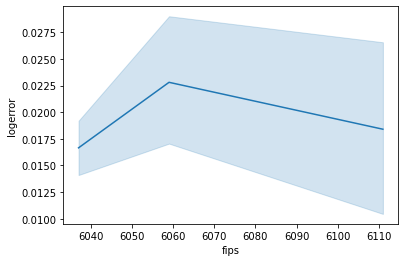

In [112]:
# lineplot to Visualize correlation
sns.lineplot(data=train, x = 'fips' ,y="logerror")

Is there a relationship
between fips and logerror?


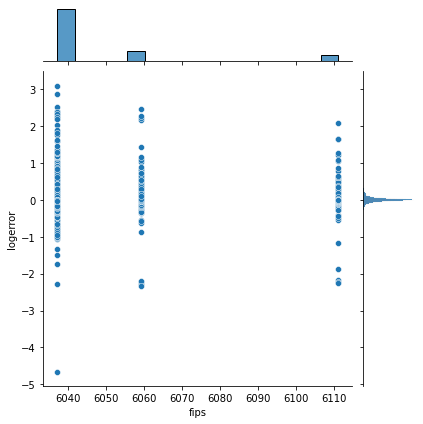

In [113]:
print("Is there a relationship\nbetween fips and logerror?")
# graph correlation using jointplot
sns.jointplot(x="fips", y="logerror", data=train)
# x label
plt.xlabel("fips")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [114]:
#set the alpha to .05
alpha = .05
# corralation fips and logerror
corr, p = stats.pearsonr(train.fips, train.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: 0.006021081426047747 , p value: 0.3961478859346407
Pvalue is: 0.3961478859346407 is greater than alpha: 0.05
We fail to reject the null hypothesis because there is no significant correlation present


### Takeaways:
- Based on the correlation test above fips and log error have no correlation.

***
***
### Is there a correlation between taxvaluedollarcnt & logerror ?
- Null Hypothesis  = there is no correlation between the taxvaluedollarcnt  of a home and logerror

- Alternative Hypothesis  = there is a correlation between the taxvaluedollarcnt  of a home and logerror

<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='logerror'>

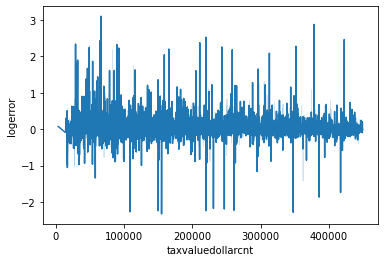

In [115]:
# lineplot to Visualize correlation
sns.lineplot(data=train, x = 'taxvaluedollarcnt' ,y="logerror")

Is there a relationship
between taxvaluedollarcnt and logerror?


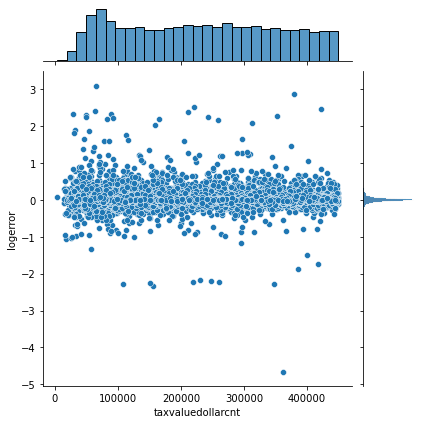

In [116]:
print("Is there a relationship\nbetween taxvaluedollarcnt and logerror?")
# graph correlation using jointplot
sns.jointplot(x="taxvaluedollarcnt", y="logerror", data=train)
# x label
plt.xlabel("taxvaluedollarcnt")
# y label
plt.ylabel("log error")
# show the graph
plt.show()

In [117]:
#set the alpha to .05
alpha = .05
# corralation taxvaluedollarcnt and logerror
corr, p = stats.pearsonr(train.taxvaluedollarcnt, train.logerror)
corr, p
#correlation test summary
print("correlation:", corr,",","p value:",p)
if p < alpha:
    print(f'Pvalue is: {p} is less than alpha: {alpha}')
    print("Reject the null hypothesis because there is a correlation present")
else:
    print(f'Pvalue is: {p} is greater than alpha: {alpha}')
    print("We fail to reject the null hypothesis because there is no significant correlation present")

correlation: -0.035451782108029906 , p value: 5.80577128513973e-07
Pvalue is: 5.80577128513973e-07 is less than alpha: 0.05
Reject the null hypothesis because there is a correlation present


### Takeaways:
- After running a corralation test we we fail to reject the null hypothesis because there is no significant correlation present between taxvaluedollarcnt and logerror. 
***
***
## Exploration Summary for Cluster 3
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between bathroomcnt and logerror
- After running a corralation test we can reject the null hypothesis and prove that there is a correlation between calculatedfinishedsquarefeet and logerror. 
- After running a corralation test we reject the null hypothesis and prove that there is correlation between bedroomcnt and logerror.
- After running a corralation test We reject the null hypothesis because there is a significant correlation between yearbuilt and logerror present.
- - After running a corralation test we we fail to reject the null hypothesis because there is no significant correlation present between taxvaluedollarcnt and logerror.

***
***
# <span style="color:blue">Modeling for cluster 3:</span>

In [118]:
#features well be working with
features = ['bathroomcnt',
                 'bedroomcnt',
                 'calculatedfinishedsquarefeet',
                 'yearbuilt',
                 'taxvaluedollarcnt',
                 'latitude', 
                 'longitude',
                 'lotsizesquarefeet',
                 'regionidcity',
                 'regionidzip',
                 'fips']
#columns we will be scaling
scale_columns = ['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet','logerror']

X_train = train[['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet']]
y_train = train['logerror']


X_validate = validate[['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet']]
y_validate = validate['logerror']


X_test = test[['yearbuilt',
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet']]
y_test = test['logerror']

def scale_data(train, 
               validate, 
               test, 
               columns_to_scale=['yearbuilt',  
                   'taxvaluedollarcnt', 
                   'bathroomcnt', 
                   'calculatedfinishedsquarefeet'],
               return_scaler=False):
    '''
    Scales the 3 data splits. 
    Takes in train, validate, and test data splits and returns their scaled counterparts.
    If return_scalar is True, the scaler object will be returned as well
    '''
    train_scaled = train.copy()
    validate_scaled = validate.copy()
    test_scaled = test.copy()
    
    scaler = MinMaxScaler()
    scaler.fit(train[columns_to_scale])
    
    train_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(train[columns_to_scale]),
                                                  columns=train[columns_to_scale].columns.values).set_index([train.index.values])
                                                  
    validate_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(validate[columns_to_scale]),
                                                  columns=validate[columns_to_scale].columns.values).set_index([validate.index.values])
    
    test_scaled[columns_to_scale] = pd.DataFrame(scaler.transform(test[columns_to_scale]),
                                                 columns=test[columns_to_scale].columns.values).set_index([test.index.values])
    
    if return_scaler:
        return scaler, train_scaled, validate_scaled, test_scaled
    else:
        return train_scaled, validate_scaled, test_scaled

In [119]:
scaler, X_train_scaled, X_validate_scaled, X_test_scaled = scale_data(X_train, X_validate, X_test, return_scaler=True)

In [120]:
# We need y_train and y_validate to be dataframes to append the new columns with predicted values.
y_train = pd.DataFrame(y_train)
y_validate = pd.DataFrame(y_validate)
# 1. Predict logerror_pred_mean
logerror_pred_mean = y_train.logerror.mean()
# creating a logerror_pred_mean column for my y_train
y_train['logerror_pred_mean'] = y_train.logerror.mean()
# creating a logerror_pred_mean column for my y_validate
y_validate['logerror_pred_mean'] = y_validate.logerror.mean()
# 2. compute logerror_pred_median
# creating a predictive median for y train 
y_train['logerror_pred_median'] = y_train.logerror.median()
# creating a predictive median for y_validate
y_validate['logerror_pred_median'] = y_validate.logerror.median()
# 3. RMSE of logerror_pred_mean
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_mean)**(1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_mean)**(1/2)
print("RMSE using Mean\nTrain/In-Sample: ", round(rmse_train, 2),
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))
# 4. RMSE of logerror_pred_median
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_median)**(1/2)
rmse_validate = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_median)**(1/2)
print("RMSE using Median\nTrain/In-Sample: ", round(rmse_train, 2),
      "\nValidate/Out-of-Sample: ", round(rmse_validate, 2))

RMSE using Mean
Train/In-Sample:  0.16 
Validate/Out-of-Sample:  0.17
RMSE using Median
Train/In-Sample:  0.16 
Validate/Out-of-Sample:  0.17


In [121]:
#predicting y from trained data
#predict rules
model = LinearRegression().fit(X_train_scaled, y_train)
predictions = model.predict(X_train_scaled)

In [122]:
y_test = pd.DataFrame(y_test)

y_test

,logerror
62595,-0.060884
24547,0.049005
48013,0.017966
9783,-0.055282
68191,0.095752
...,...
19224,0.002202
6855,-0.030367
49446,0.003754
1127,-0.038751


### LinearRegression (ols)

In [123]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm.fit(X_train_scaled, y_train.logerror)

# predict train
y_train['logerror_pred_lm'] = lm.predict(X_train_scaled)

# evaluate: rmse
rmse_train = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm)**(1/2)

# predict validate
y_validate['logerror_pred_lm'] = lm.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_lm = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm)**(1/2)

print("RMSE for OLS using LinearRegression\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lm)

RMSE for OLS using LinearRegression
Training/In-Sample:  0.16204035701067623 
Validation/Out-of-Sample:  0.1662390920154774


In [124]:
#residuals
y_train['lm_residuals'] = y_train['logerror_pred_lm'] - y_train['logerror']
y_validate['lm_residuals'] = y_validate['logerror_pred_lm'] - y_validate['logerror']


### LassoLars (lars)

In [125]:
# create the model object
lars = LassoLars(alpha=1.0)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lars.fit(X_train_scaled, y_train.logerror)

# predict train
y_train['logerror_pred_lars'] = lars.predict(X_train_scaled)

# evaluate: rmse
rmse_train_lars = mean_squared_error(y_train.logerror, y_train.logerror_pred_lars)**(1/2)

# predict validate
y_validate['logerror_pred_lars'] = lars.predict(X_validate_scaled)

# evaluate: rmse
rmse_validate_lars = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lars)**(1/2)

print("RMSE for Lasso + Lars\nTraining/In-Sample: ", rmse_train_lars, 
      "\nValidation/Out-of-Sample: ", rmse_validate_lars)

RMSE for Lasso + Lars
Training/In-Sample:  0.16216826562110584 
Validation/Out-of-Sample:  0.1663646528910004


In [126]:
#residuals
y_train['lars_residuals'] = y_train['logerror_pred_lars'] - y_train['logerror']
y_validate['lars_residuals'] = y_validate['logerror_pred_lars'] - y_validate['logerror']


### Polynomial Regression

In [127]:
# make the polynomial features to get a new set of features
pf = PolynomialFeatures(degree=2)

# fit and transform X_train_scaled
X_train_degree2 = pf.fit_transform(X_train_scaled)

# transform X_validate_scaled & X_test_scaled
X_validate_degree2 = pf.transform(X_validate_scaled)
X_test_degree2 = pf.transform(X_test_scaled)

In [128]:
# create the model object
lm2 = LinearRegression(normalize=True)

# fit the model to our training data. We must specify the column in y_train, 
# since we have converted it to a dataframe from a series! 
lm2.fit(X_train_degree2, y_train.logerror)

# predict train
y_train['logerror_pred_lm2'] = lm2.predict(X_train_degree2)

# evaluate: rmse
rmse_train_lm2 = mean_squared_error(y_train.logerror, y_train.logerror_pred_lm2)**(1/2)

# predict validate
y_validate['logerror_pred_lm2'] = lm2.predict(X_validate_degree2)

# evaluate: rmse
rmse_validate_lm2 = mean_squared_error(y_validate.logerror, y_validate.logerror_pred_lm2)**(1/2)

print("RMSE for Polynomial Model, degrees=2\nTraining/In-Sample: ", rmse_train, 
      "\nValidation/Out-of-Sample: ", rmse_validate)

RMSE for Polynomial Model, degrees=2
Training/In-Sample:  0.16204035701067623 
Validation/Out-of-Sample:  0.16656891596675277


In [129]:
#residuals
y_train['poly_residuals'] = y_train['logerror_pred_lm2'] - y_train['logerror']
y_validate['poly_residuals'] = y_validate['logerror_pred_lm2'] - y_validate['logerror']

***
***
# What is our baseline so we can compare it to our models?

In [130]:
from sklearn.linear_model import LinearRegression
y = pd.DataFrame(y_train.logerror)
X = pd.DataFrame(X_train_scaled)
# assuming X and y are already defined
model = LinearRegression().fit(X, y)
train['yhat'] = model.predict(X)
train

,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,fips,latitude,longitude,lotsizesquarefeet,regionidcity,regionidzip,yearbuilt,taxvaluedollarcnt,logerror,cluster,yhat
63023,2.0,3.0,1909.0,6037.0,34643208.0,-118230998.0,10200.0,5534.0,97319.0,1970.0,193414.0,0.068977,1,0.019340
23746,2.0,4.0,1833.0,6059.0,33823062.0,-117876762.0,7725.0,16764.0,97025.0,1962.0,418809.0,-0.015528,1,0.008532
32922,2.0,3.0,1313.0,6037.0,34697165.0,-118104936.0,9487.0,5534.0,97318.0,1990.0,93619.0,-0.027203,1,0.022437
50980,2.5,4.0,2054.0,6059.0,33739980.0,-117974469.0,6100.0,34780.0,96990.0,1959.0,309663.0,-0.020591,1,0.016751
19014,1.0,3.0,1062.0,6037.0,34196955.0,-118554818.0,6032.0,12447.0,96364.0,1951.0,316212.0,-0.023401,1,0.009425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48140,2.5,4.0,2041.0,6059.0,33935342.0,-117913591.0,13188.0,17150.0,97035.0,1957.0,265781.0,0.028972,1,0.019116
54079,2.0,3.0,1286.0,6037.0,33849772.0,-118252964.0,4626.0,10723.0,96230.0,1970.0,326748.0,0.006161,1,0.012208
13549,1.0,3.0,1374.0,6037.0,33951978.0,-118079813.0,5489.0,13716.0,96201.0,1951.0,56074.0,0.006252,1,0.022765
8552,2.5,4.0,2138.0,6059.0,33511644.0,-117639959.0,5225.0,33840.0,96985.0,1975.0,319246.0,0.094903,1,0.015068


In [131]:
df = pd.DataFrame(train[['calculatedfinishedsquarefeet','bathroomcnt','bedroomcnt','taxvaluedollarcnt','logerror','yhat']])
df.head()

,calculatedfinishedsquarefeet,bathroomcnt,bedroomcnt,taxvaluedollarcnt,logerror,yhat
63023,1909.0,2.0,3.0,193414.0,0.068977,0.019340
23746,1833.0,2.0,4.0,418809.0,-0.015528,0.008532
32922,1313.0,2.0,3.0,93619.0,-0.027203,0.022437
50980,2054.0,2.5,4.0,309663.0,-0.020591,0.016751
19014,1062.0,1.0,3.0,316212.0,-0.023401,0.009425


In [132]:
#creating a baseline from the mean of the target variable
baseline = y.mean()
df['baseline'] = df.logerror.mean()
# turning baseline to int from float
df.baseline = df.baseline.astype(int)
# residual = actual - predicted
df['residual'] = df.logerror - df.yhat
df['baseline_residual'] = df.logerror - df.baseline

In [133]:
print(baseline)

logerror    0.017681
dtype: float64


### Baseline is 0.011603

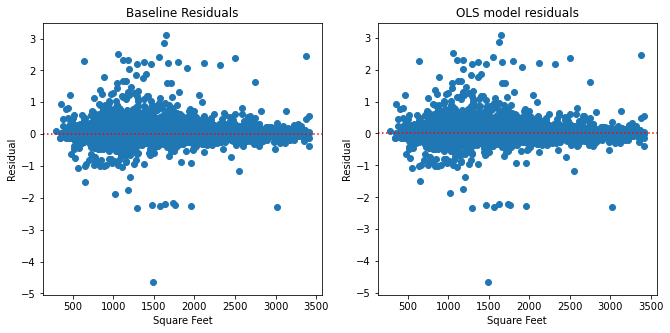

In [134]:
# residual plots (x vs residual)

plt.figure(figsize = (11,5))

plt.subplot(121)
plt.scatter(df.calculatedfinishedsquarefeet, df.baseline_residual)
plt.axhline(y = 0, ls = ':', color='red')
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('Baseline Residuals')

plt.subplot(122)
plt.scatter(df.calculatedfinishedsquarefeet, df.residual)
plt.axhline(y = 0, ls = ':', color ='red')
plt.xlabel('Square Feet')
plt.ylabel('Residual')
plt.title('OLS model residuals');

In [135]:
# sum of residual is zero
df.residual.sum()

1.1546319456101628e-14

In [136]:
# sum of baseline residual is zero too
df.baseline_residual.sum()


351.18179929453737

In [137]:
df['residual^2'] = df.residual**2
df['baseline_residual^2'] = df.baseline_residual**2

df.head()

,calculatedfinishedsquarefeet,bathroomcnt,bedroomcnt,taxvaluedollarcnt,logerror,yhat,baseline,residual,baseline_residual,residual^2,baseline_residual^2
63023,1909.0,2.0,3.0,193414.0,0.068977,0.019340,0,0.049636,0.068977,0.002464,0.004758
23746,1833.0,2.0,4.0,418809.0,-0.015528,0.008532,0,-0.024060,-0.015528,0.000579,0.000241
32922,1313.0,2.0,3.0,93619.0,-0.027203,0.022437,0,-0.049639,-0.027203,0.002464,0.000740
50980,2054.0,2.5,4.0,309663.0,-0.020591,0.016751,0,-0.037342,-0.020591,0.001394,0.000424
19014,1062.0,1.0,3.0,316212.0,-0.023401,0.009425,0,-0.032826,-0.023401,0.001078,0.000548


In [138]:
SSE = df['residual^2'].sum()
SSE_baseline = df['baseline_residual^2'].sum()

print('SSE =', "{:.1f}".format(SSE))
print("SSE Baseline =", "{:.1f}".format(SSE_baseline))

if SSE < SSE_baseline:
    print('SSE is better than baseline')
else:
    print('baseline is better')

SSE = 521.5
SSE Baseline = 528.6
SSE is better than baseline


In [139]:
len(df)
df.shape[0]

19862

In [140]:
MSE = SSE/len(df)
MSE_baseline = SSE_baseline/len(df)

print("MSE = ", "{:.1f}".format(MSE))
print("MSE baseline = ", "{:.1f}".format(MSE_baseline))

if MSE < MSE_baseline:
    print('MSE is better than baseline')
else:
    print('baseline is better')

MSE =  0.0
MSE baseline =  0.0
MSE is better than baseline


In [141]:
from math import sqrt
RMSE = sqrt(MSE)
RMSE_baseline =  sqrt(MSE_baseline)

if RMSE < RMSE_baseline:
    print('RMSE is better than baseline')
else:
    print('baseline is better')
    
print("RMSE = ", "{:.1f}".format(RMSE))
print("RMSE baseline = ", "{:.1f}".format(RMSE_baseline))


RMSE is better than baseline
RMSE =  0.2
RMSE baseline =  0.2


In [142]:
if SSE < SSE_baseline:
    print('OLS regression model performs better than the baseline')
else:
    print('OLS regression model performs worse than the baseline')


OLS regression model performs better than the baseline


In [143]:
# sklearn.metrics.explained_variance_score

evs = explained_variance_score(df.logerror, df.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.002


In [144]:
# calculate R2 the easy way:
from sklearn.metrics import r2_score
r2_score(df.logerror, df.yhat)

0.0015768580445286728

In [145]:
X2 = sm.add_constant(df.calculatedfinishedsquarefeet)
est = sm.OLS(df.logerror, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               logerror   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.049
Date:                Sun, 19 Jun 2022   Prob (F-statistic):              0.306
Time:                        21:04:12   Log-Likelihood:                 7948.9
No. Observations:               19862   AIC:                        -1.589e+04
Df Residuals:                   19860   BIC:                        -1.588e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

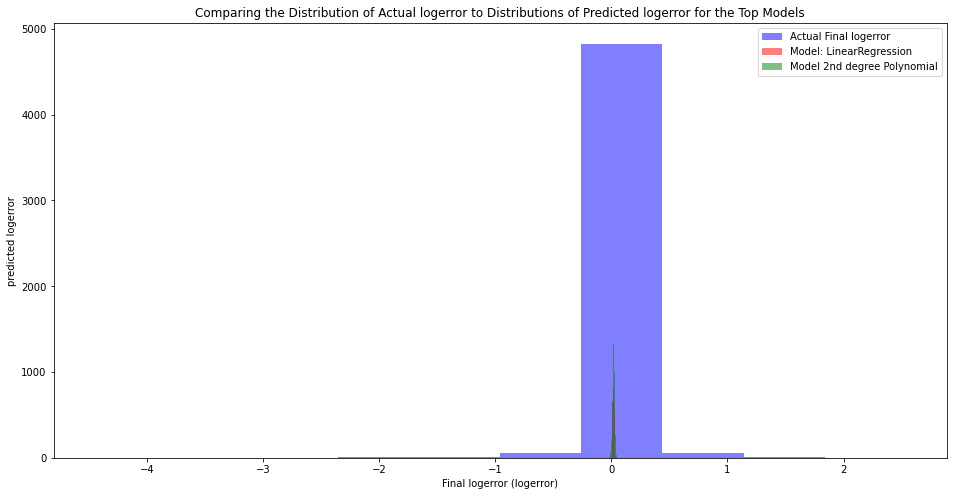

In [148]:
def actual_vs_predicted():
    # plot to visualize actual vs predicted. 
    plt.figure(figsize=(16,8))
    plt.hist(y_validate.logerror, color='blue', alpha=.5, label="Actual Final logerror")
    plt.hist(y_validate.logerror_pred_lm, color='red', alpha=.5, label="Model: LinearRegression")
    plt.hist(y_validate.logerror_pred_lm2, color='green', alpha=.5, label="Model 2nd degree Polynomial")
    plt.xlabel("Final logerror (logerror)")
    plt.ylabel("predicted logerror")
    plt.title("Comparing the Distribution of Actual logerror to Distributions of Predicted logerror for the Top Models")
    plt.legend()
    plt.show()
actual_vs_predicted()

In [149]:
y_train

,logerror,logerror_pred_mean,logerror_pred_median,logerror_pred_lm,lm_residuals,logerror_pred_lars,lars_residuals,logerror_pred_lm2,poly_residuals
63023,0.068977,0.017681,0.005648,0.019340,-0.049636,0.017681,-0.051296,0.018560,-0.050417
23746,-0.015528,0.017681,0.005648,0.008532,0.024060,0.017681,0.033209,0.014497,0.030025
32922,-0.027203,0.017681,0.005648,0.022437,0.049639,0.017681,0.044884,0.013912,0.041114
50980,-0.020591,0.017681,0.005648,0.016751,0.037342,0.017681,0.038272,0.020310,0.040901
19014,-0.023401,0.017681,0.005648,0.009425,0.032826,0.017681,0.041082,0.011019,0.034420
...,...,...,...,...,...,...,...,...,...
48140,0.028972,0.017681,0.005648,0.019116,-0.009855,0.017681,-0.011290,0.020918,-0.008053
54079,0.006161,0.017681,0.005648,0.012208,0.006047,0.017681,0.011520,0.012064,0.005904
13549,0.006252,0.017681,0.005648,0.022765,0.016513,0.017681,0.011429,0.028419,0.022167
8552,0.094903,0.017681,0.005648,0.015068,-0.079835,0.017681,-0.077222,0.018470,-0.076434


In [151]:
metric_df = pd.DataFrame(data=[{
    'model': 'mean_baseline', 
    'RMSE_validate': rmse_validate,
        'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_mean)}])
metric_df = metric_df.append({
    'model': 'OLS Regressor', 
    'RMSE_validate': rmse_validate_lm,
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_lm)}, ignore_index=True)
metric_df = metric_df.append({
    'model': 'Lasso alpha 1', 
    'RMSE_validate': rmse_validate_lars,
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_lars)}, ignore_index=True)
metric_df = metric_df.append({
    'model': 'Quadratic Model', 
    'RMSE_validate': rmse_validate_lm2,
    'r^2_validate': explained_variance_score(y_validate.logerror, y_validate.logerror_pred_lm2)}, ignore_index=True)


In [152]:
metric_df   

,model,RMSE_validate,r^2_validate
0,mean_baseline,0.166569,0.000000
1,OLS Regressor,0.166239,0.001492
2,Lasso alpha 1,0.166365,0.000000
3,Quadratic Model,0.166242,0.001451
